# 1. Customer Behavior Analytics (Task 1)

In [142]:
# import all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()


sns.set_style("white")
sns.set_palette("GnBu_d")

# also import these "new" libraries 
# Note: you may have to download an add them to your environment (using e.g. 'conda install -c conda-forge folium')

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
from math import radians, cos, sin, asin, sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
#import timeit
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

## 1.1 Bike Dataset

Reading in the **bike dataset** and performing some basic operations

In [2]:
PHL_17 = pd.read_csv("PHL_2017.csv", encoding = "ISO-8859-1")
PHL_17.sort_values("start_time", inplace = True)

In [3]:
PHL_17.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,1/1/2017 0:05,1/1/2017 0:16,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL"
1,1/1/2017 0:21,1/1/2017 0:57,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum
2,1/1/2017 0:22,1/1/2017 0:57,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum
3,1/1/2017 0:27,1/1/2017 0:39,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS"
4,1/1/2017 0:28,1/1/2017 0:36,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier


Changing datatype from string to **datetime** in order to make the dataframe **maskable**

In [4]:
PHL_17['start_time'] = pd.to_datetime(PHL_17['start_time'])
PHL_17['end_time'] = pd.to_datetime(PHL_17['end_time'])

In [5]:
PHL_17

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,2017-01-01 00:05:00,2017-01-01 00:16:00,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL"
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum
3,2017-01-01 00:27:00,2017-01-01 00:39:00,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS"
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier
...,...,...,...,...,...,...,...,...
82772,2017-03-09 09:58:00,2017-03-09 10:55:00,3047,3057,2475,Walk-up,"Independence Mall, NPS",Philadelphia Museum of Art
82773,2017-03-09 09:58:00,2017-03-09 10:35:00,3106,3066,3510,Indego30,33rd & Dauphin,19th & Lombard
82776,2017-03-09 09:59:00,2017-03-09 10:55:00,3047,3057,3630,Walk-up,"Independence Mall, NPS",Philadelphia Museum of Art
82774,2017-03-09 09:59:00,2017-03-09 17:00:00,3006,3006,3497,Indego30,40th & Spruce,40th & Spruce


In [6]:
PHL_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788907 entries, 0 to 82775
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_time          788907 non-null  datetime64[ns]
 1   end_time            788907 non-null  datetime64[ns]
 2   start_station_id    788907 non-null  int64         
 3   end_station_id      788907 non-null  int64         
 4   bike_id             788907 non-null  int64         
 5   user_type           788907 non-null  object        
 6   start_station_name  788907 non-null  object        
 7   end_station_name    788907 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 54.2+ MB


In [7]:
PHL_17.describe()

,start_station_id,end_station_id,bike_id
count,788907.000000,788907.000000,788907.000000
mean,3057.400081,3056.431487,5428.980913
std,41.126829,41.108792,3221.972215
min,3000.000000,3000.000000,0.000000
25%,3023.000000,3023.000000,3350.000000
50%,3050.000000,3049.000000,3703.000000
75%,3075.000000,3074.000000,5370.000000
max,3170.000000,3170.000000,11965.000000


Checking the bike dataset for **NULL values**

In [8]:
PHL_17[PHL_17.isnull().any(axis=1)]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name


In [9]:
print(PHL_17.isnull().sum())

start_time            0
end_time              0
start_station_id      0
end_station_id        0
bike_id               0
user_type             0
start_station_name    0
end_station_name      0
dtype: int64


Seemingly no NULL values exist in the bike dataset

Let's add some **more features** to our dataset, in order to have some richer information

In [10]:
PHL_17['date'] = PHL_17['start_time'].dt.date
PHL_17['hour'] = PHL_17['start_time'].dt.hour
PHL_17['weekday'] = PHL_17['start_time'].dt.weekday
PHL_17['month'] = PHL_17['start_time'].dt.month
PHL_17['duration'] = PHL_17['end_time'] - PHL_17['start_time']
# Could also define functions in order to map it to the dataframe

In [11]:
PHL_17[PHL_17["start_time"].dt.month == 12]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration
752942,2017-12-01 00:03:00,2017-12-01 00:22:00,3023,3035,5331,Indego30,Rittenhouse Square,Dornsife Center,2017-12-01,0,4,12,0 days 00:19:00
752943,2017-12-01 00:04:00,2017-12-01 00:08:00,3059,3013,2646,Indego30,"Spring Garden Station, BSL",6th & Fairmount,2017-12-01,0,4,12,0 days 00:04:00
752944,2017-12-01 00:04:00,2017-12-01 00:08:00,3054,3156,11775,Indego30,Rodin Museum,20th & Market,2017-12-01,0,4,12,0 days 00:04:00
752945,2017-12-01 00:09:00,2017-12-01 00:29:00,3037,3053,5154,Indego30,Pennsylvania Convention Center,Point Breeze & Tasker,2017-12-01,0,4,12,0 days 00:20:00
752946,2017-12-01 00:10:00,2017-12-01 00:17:00,3055,3049,11933,Indego30,8th & Market,Foglietta Plaza,2017-12-01,0,4,12,0 days 00:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788902,2017-12-31 23:05:00,2017-12-31 23:33:00,3070,3124,3708,Indego30,"Spring Garden Station, MFL",Race Street Pier,2017-12-31,23,6,12,0 days 00:28:00
788903,2017-12-31 23:11:00,2018-01-01 11:03:00,3107,3165,5117,Indego30,33rd & Reservoir,24th & Race SRT,2017-12-31,23,6,12,0 days 11:52:00
788904,2017-12-31 23:18:00,2017-12-31 23:25:00,3033,3046,11933,Indego30,10th & Chestnut,2nd & Market,2017-12-31,23,6,12,0 days 00:07:00
788905,2017-12-31 23:39:00,2017-12-31 23:40:00,3163,3163,6725,Indego30,25th & Locust,25th & Locust,2017-12-31,23,6,12,0 days 00:01:00


Checking for further  **errorneous data**, *e.g. negative ride durations*

In [12]:
PHL_17["duration"].describe()

count                       788907
mean     0 days 00:21:37.842863607
std      0 days 01:14:50.111112609
min              -1 days +23:28:00
25%                0 days 00:07:00
50%                0 days 00:11:00
75%                0 days 00:18:00
max                6 days 04:09:00
Name: duration, dtype: object

In [13]:
PHL_17[PHL_17["end_time"] < PHL_17["start_time"]]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration
704926,2017-11-05 01:35:00,2017-11-05 01:03:00,3118,3111,6694,Indego30,"46th Street Station, MFL","Parkside & Belmont, Case Building",2017-11-05,1,6,11,-1 days +23:28:00
704929,2017-11-05 01:39:00,2017-11-05 01:35:00,3066,3066,2551,Indego30,19th & Lombard,19th & Lombard,2017-11-05,1,6,11,-1 days +23:56:00
704933,2017-11-05 01:51:00,2017-11-05 01:20:00,3157,3041,11750,Indego30,"8th & Mifflin, Bok Building","Girard Station, MFL",2017-11-05,1,6,11,-1 days +23:29:00


Dropping the three rows with the negative durations

In [14]:
PHL_17.drop(PHL_17[PHL_17["end_time"] < PHL_17["start_time"]].index, inplace=True)

In [15]:
PHL_17[PHL_17["end_time"] < PHL_17["start_time"]]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration


All rows with negative durations have been deleted successfully

In [16]:
PHL_17["duration"].describe()

count                       788904
mean     0 days 00:21:37.852894648
std      0 days 01:14:50.116447017
min                0 days 00:01:00
25%                0 days 00:07:00
50%                0 days 00:11:00
75%                0 days 00:18:00
max                6 days 04:09:00
Name: duration, dtype: object

As seen above, the **average ride duration** is about **21 minutes**

Length of our current dataframe

In [17]:
len(PHL_17)

788904

## 1.2 Some first geographical visualizations

Let's do some first **geographical visualizations** on the Bike Dataset. Therefore we have to gain some more information on the stations by joining another **dataframe** to our existing bike dataframe:

We got **extended quaterly data** that we now want to **concatenate** in order to join some information to our existing table

In [18]:
PHL_extended_17_1 = pd.read_csv("PHL_extended_17_1.csv", encoding = "ISO-8859-1")
PHL_extended_17_2 = pd.read_csv("PHL_extended_17_2.csv", encoding = "ISO-8859-1")
PHL_extended_17_3 = pd.read_csv("PHL_extended_17_3.csv", encoding = "ISO-8859-1")
PHL_extended_17_4 = pd.read_csv("PHL_extended_17_4.csv", encoding = "ISO-8859-1")

frames = [PHL_extended_17_1,PHL_extended_17_2,PHL_extended_17_3,PHL_extended_17_4]
PHL_extended = pd.concat(frames)

PHL_extended.set_index("trip_id", inplace=True)

PHL_extended.head()

,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
trip_id,,,,,,,,,,,,,,,
87535955,660,1/1/2017 0:05,1/1/2017 0:16,3046.0,39.950119,-75.144722,3041.0,39.968491,-75.135460,5347,30,One Way,Indego30,NaN,NaN
87535954,2160,1/1/2017 0:21,1/1/2017 0:57,3110.0,39.961750,-75.136414,3054.0,39.962502,-75.174202,3364,0,One Way,Walk-up,NaN,NaN
87535953,2100,1/1/2017 0:22,1/1/2017 0:57,3110.0,39.961750,-75.136414,3054.0,39.962502,-75.174202,2536,0,One Way,Walk-up,NaN,NaN
87535952,720,1/1/2017 0:27,1/1/2017 0:39,3041.0,39.968491,-75.135460,3005.0,39.947330,-75.144028,5176,30,One Way,Indego30,NaN,NaN
87535951,480,1/1/2017 0:28,1/1/2017 0:36,3047.0,39.950710,-75.149208,3124.0,39.952950,-75.139793,5370,0,One Way,Walk-up,NaN,NaN


Check if concatenation was successfull

In [19]:
print(len(PHL_extended_17_1))
print(len(PHL_extended_17_2))
print(len(PHL_extended_17_3))
print(len(PHL_extended_17_4))
print(len(PHL_extended))

107772
220441
276785
183909
788907


In [20]:
PHL_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788907 entries, 87535955 to 223865569
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   duration             788907 non-null  int64  
 1   start_time           788907 non-null  object 
 2   end_time             788907 non-null  object 
 3   start_station_id     107772 non-null  float64
 4   start_lat            788797 non-null  float64
 5   start_lon            788797 non-null  float64
 6   end_station_id       107772 non-null  float64
 7   end_lat              782652 non-null  float64
 8   end_lon              782652 non-null  float64
 9   bike_id              788907 non-null  int64  
 10  plan_duration        788907 non-null  int64  
 11  trip_route_category  788907 non-null  object 
 12  passholder_type      788907 non-null  object 
 13  start_station        681135 non-null  float64
 14  end_station          681135 non-null  float64
dtypes: floa

Dropping unessacary columns, only keep station id and location data

In [21]:
PHL_extended = PHL_extended[["start_station_id","end_station_id","start_lat", "start_lon", "end_lat","end_lon"]]

Checking if both station columns contain the same amount of stations

In [22]:
len(PHL_extended['start_station_id'].unique())

107

In [23]:
len(PHL_extended['end_station_id'].unique())

107

Now we can keep one of the station columns

In [24]:
PHL_extended.drop_duplicates(subset='start_station_id', inplace=True)
PHL_extended.drop('end_station_id', axis=1, inplace=True)
PHL_extended.drop('end_lat', axis=1, inplace=True)
PHL_extended.drop('end_lon', axis=1, inplace=True)
PHL_extended.head()

,start_station_id,start_lat,start_lon
trip_id,,,
87535955,3046.0,39.950119,-75.144722
87535954,3110.0,39.961750,-75.136414
87535952,3041.0,39.968491,-75.135460
87535951,3047.0,39.950710,-75.149208
87535949,3072.0,39.934448,-75.145409


In [25]:
PHL_extended['end_station_id'] = PHL_extended['start_station_id']
PHL_extended['end_lat'] = PHL_extended['start_lat']
PHL_extended['end_lon'] = PHL_extended['start_lon']
PHL_extended.head()

,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon
trip_id,,,,,,
87535955,3046.0,39.950119,-75.144722,3046.0,39.950119,-75.144722
87535954,3110.0,39.961750,-75.136414,3110.0,39.961750,-75.136414
87535952,3041.0,39.968491,-75.135460,3041.0,39.968491,-75.135460
87535951,3047.0,39.950710,-75.149208,3047.0,39.950710,-75.149208
87535949,3072.0,39.934448,-75.145409,3072.0,39.934448,-75.145409


Now we are trying to **merge our location data** to our existing bike dataframe by performing a **left join**

In [26]:
PHL_17 = pd.merge(PHL_17, PHL_extended[['start_station_id', 'start_lat', 'start_lon']],on='start_station_id', how='left')
PHL_17 = pd.merge(PHL_17, PHL_extended[['end_station_id', 'end_lat', 'end_lon']],on='end_station_id', how='left')

In [27]:
PHL_17

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration,start_lat,start_lon,end_lat,end_lon
0,2017-01-01 00:05:00,2017-01-01 00:16:00,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL",2017-01-01,0,6,1,0 days 00:11:00,39.950119,-75.144722,39.968491,-75.135460
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum,2017-01-01,0,6,1,0 days 00:36:00,39.961750,-75.136414,39.962502,-75.174202
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum,2017-01-01,0,6,1,0 days 00:35:00,39.961750,-75.136414,39.962502,-75.174202
3,2017-01-01 00:27:00,2017-01-01 00:39:00,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS",2017-01-01,0,6,1,0 days 00:12:00,39.968491,-75.135460,39.947330,-75.144028
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier,2017-01-01,0,6,1,0 days 00:08:00,39.950710,-75.149208,39.952950,-75.139793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788899,2017-03-09 09:58:00,2017-03-09 10:55:00,3047,3057,2475,Walk-up,"Independence Mall, NPS",Philadelphia Museum of Art,2017-03-09,9,3,3,0 days 00:57:00,39.950710,-75.149208,39.963711,-75.181602
788900,2017-03-09 09:58:00,2017-03-09 10:35:00,3106,3066,3510,Indego30,33rd & Dauphin,19th & Lombard,2017-03-09,9,3,3,0 days 00:37:00,39.991791,-75.186371,39.945610,-75.173477
788901,2017-03-09 09:59:00,2017-03-09 10:55:00,3047,3057,3630,Walk-up,"Independence Mall, NPS",Philadelphia Museum of Art,2017-03-09,9,3,3,0 days 00:56:00,39.950710,-75.149208,39.963711,-75.181602
788902,2017-03-09 09:59:00,2017-03-09 17:00:00,3006,3006,3497,Indego30,40th & Spruce,40th & Spruce,2017-03-09,9,3,3,0 days 07:01:00,39.952202,-75.203110,39.952202,-75.203110


Now that we finally have lon and lat, we can zip them into **coordinates**

In [28]:
PHL_17["start_coordinates"] = list(zip(PHL_17["start_lat"].round(4), PHL_17["start_lon"].round(4)))
PHL_17["end_coordinates"] = list(zip(PHL_17["end_lat"].round(4), PHL_17["end_lon"].round(4)))

In [29]:
PHL_17

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration,start_lat,start_lon,end_lat,end_lon,start_coordinates,end_coordinates
0,2017-01-01 00:05:00,2017-01-01 00:16:00,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL",2017-01-01,0,6,1,0 days 00:11:00,39.950119,-75.144722,39.968491,-75.135460,"(39.9501, -75.1447)","(39.9685, -75.1355)"
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum,2017-01-01,0,6,1,0 days 00:36:00,39.961750,-75.136414,39.962502,-75.174202,"(39.9618, -75.1364)","(39.9625, -75.1742)"
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum,2017-01-01,0,6,1,0 days 00:35:00,39.961750,-75.136414,39.962502,-75.174202,"(39.9618, -75.1364)","(39.9625, -75.1742)"
3,2017-01-01 00:27:00,2017-01-01 00:39:00,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS",2017-01-01,0,6,1,0 days 00:12:00,39.968491,-75.135460,39.947330,-75.144028,"(39.9685, -75.1355)","(39.9473, -75.144)"
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier,2017-01-01,0,6,1,0 days 00:08:00,39.950710,-75.149208,39.952950,-75.139793,"(39.9507, -75.1492)","(39.953, -75.1398)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788899,2017-03-09 09:58:00,2017-03-09 10:55:00,3047,3057,2475,Walk-up,"Independence Mall, NPS",Philadelphia Museum of Art,2017-03-09,9,3,3,0 days 00:57:00,39.950710,-75.149208,39.963711,-75.181602,"(39.9507, -75.1492)","(39.9637, -75.1816)"
788900,2017-03-09 09:58:00,2017-03-09 10:35:00,3106,3066,3510,Indego30,33rd & Dauphin,19th & Lombard,2017-03-09,9,3,3,0 days 00:37:00,39.991791,-75.186371,39.945610,-75.173477,"(39.9918, -75.1864)","(39.9456, -75.1735)"
788901,2017-03-09 09:59:00,2017-03-09 10:55:00,3047,3057,3630,Walk-up,"Independence Mall, NPS",Philadelphia Museum of Art,2017-03-09,9,3,3,0 days 00:56:00,39.950710,-75.149208,39.963711,-75.181602,"(39.9507, -75.1492)","(39.9637, -75.1816)"
788902,2017-03-09 09:59:00,2017-03-09 17:00:00,3006,3006,3497,Indego30,40th & Spruce,40th & Spruce,2017-03-09,9,3,3,0 days 07:01:00,39.952202,-75.203110,39.952202,-75.203110,"(39.9522, -75.2031)","(39.9522, -75.2031)"


In [30]:
PHL_17[PHL_17.isnull().any(axis=1)]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration,start_lat,start_lon,end_lat,end_lon,start_coordinates,end_coordinates
76,2017-01-01 11:30:00,2017-01-02 14:21:00,3068,3000,3553,Indego30,Broad & Federal,Virtual Station,2017-01-01,11,6,1,1 days 02:51:00,39.935490,-75.167107,NaN,NaN,"(39.9355, -75.1671)","(nan, nan)"
164,2017-01-01 12:53:00,2017-01-01 13:53:00,3047,3000,5369,Walk-up,"Independence Mall, NPS",Virtual Station,2017-01-01,12,6,1,0 days 01:00:00,39.950710,-75.149208,NaN,NaN,"(39.9507, -75.1492)","(nan, nan)"
223,2017-01-01 13:38:00,2017-01-01 13:47:00,3051,3000,5215,Indego30,23rd & Fairmount,Virtual Station,2017-01-01,13,6,1,0 days 00:09:00,39.967442,-75.175072,NaN,NaN,"(39.9674, -75.1751)","(nan, nan)"
252,2017-01-01 14:00:00,2017-01-01 17:02:00,3010,3000,3331,Walk-up,15th & Spruce,Virtual Station,2017-01-01,14,6,1,0 days 03:02:00,39.947109,-75.166183,NaN,NaN,"(39.9471, -75.1662)","(nan, nan)"
281,2017-01-01 14:26:00,2017-01-02 14:19:00,3047,3000,5240,Walk-up,"Independence Mall, NPS",Virtual Station,2017-01-01,14,6,1,0 days 23:53:00,39.950710,-75.149208,NaN,NaN,"(39.9507, -75.1492)","(nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788590,2017-03-09 08:08:00,2017-03-09 11:10:00,3028,3000,5131,Indego30,4th & Bainbridge,Virtual Station,2017-03-09,8,3,3,0 days 03:02:00,39.940609,-75.149582,NaN,NaN,"(39.9406, -75.1496)","(nan, nan)"
788659,2017-03-09 08:27:00,2017-03-09 13:02:00,3028,3000,2504,Indego30,4th & Bainbridge,Virtual Station,2017-03-09,8,3,3,0 days 04:35:00,39.940609,-75.149582,NaN,NaN,"(39.9406, -75.1496)","(nan, nan)"
788681,2017-03-09 08:33:00,2017-03-09 08:39:00,3107,3000,2584,Indego30,33rd & Reservoir,Virtual Station,2017-03-09,8,3,3,0 days 00:06:00,39.982029,-75.188660,NaN,NaN,"(39.982, -75.1887)","(nan, nan)"
788787,2017-03-09 09:09:00,2017-03-09 09:27:00,3055,3000,11004,Indego30,8th & Market,Virtual Station,2017-03-09,9,3,3,0 days 00:18:00,39.951118,-75.154572,NaN,NaN,"(39.9511, -75.1546)","(nan, nan)"


Stations with id 3000 are virtual stations

In [31]:
len(PHL_17[PHL_17["start_station_id"] == 3000])

110

In [32]:
len(PHL_17[PHL_17["end_station_id"] == 3000])

6255

We drop the stations with id 3000 (virtual stations). Otherwise folium will throw an error!

In [33]:
PHL_17_geo = PHL_17.copy()

PHL_17_geo.drop(PHL_17_geo[PHL_17_geo["start_station_id"] == 3000].index, inplace=True)
PHL_17_geo.drop(PHL_17_geo[PHL_17_geo["end_station_id"] == 3000].index, inplace=True)

In [34]:
PHL_17_geo.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration,start_lat,start_lon,end_lat,end_lon,start_coordinates,end_coordinates
0,2017-01-01 00:05:00,2017-01-01 00:16:00,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL",2017-01-01,0,6,1,0 days 00:11:00,39.950119,-75.144722,39.968491,-75.135460,"(39.9501, -75.1447)","(39.9685, -75.1355)"
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum,2017-01-01,0,6,1,0 days 00:36:00,39.961750,-75.136414,39.962502,-75.174202,"(39.9618, -75.1364)","(39.9625, -75.1742)"
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum,2017-01-01,0,6,1,0 days 00:35:00,39.961750,-75.136414,39.962502,-75.174202,"(39.9618, -75.1364)","(39.9625, -75.1742)"
3,2017-01-01 00:27:00,2017-01-01 00:39:00,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS",2017-01-01,0,6,1,0 days 00:12:00,39.968491,-75.135460,39.947330,-75.144028,"(39.9685, -75.1355)","(39.9473, -75.144)"
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier,2017-01-01,0,6,1,0 days 00:08:00,39.950710,-75.149208,39.952950,-75.139793,"(39.9507, -75.1492)","(39.953, -75.1398)"


Double checking if main dataframe was accidentially edited

In [35]:
len(PHL_17[PHL_17["start_station_id"] == 3000])

110

In [36]:
len(PHL_17[PHL_17["end_station_id"] == 3000])

6255

In [37]:
len(PHL_17_geo[PHL_17_geo["start_station_id"] == 3000])

0

In [38]:
PHL_17_geo.dropna(axis=0, inplace=True)

In [39]:
len(PHL_17_geo)

700455

Length is now 700455 rows instead of 788904 as after previous dropping

Finding the most popular start station (of all bikes)

In [40]:
PHL_17['start_station_id'].value_counts()

3023    24828
3010    23655
3021    19828
3045    19222
3054    16405
        ...  
3164      588
3168      133
3000      110
3116       48
3083       10
Name: start_station_id, Length: 126, dtype: int64

In [41]:
PHL_17[PHL_17['start_station_id'] == 3023]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration,start_lat,start_lon,end_lat,end_lon,start_coordinates,end_coordinates
42,2017-01-01 10:44:00,2017-01-01 10:49:00,3023,3125,5255,Indego30,Rittenhouse Square,15th & South,2017-01-01,10,6,1,0 days 00:05:00,39.950481,-75.172859,39.943909,-75.167351,"(39.9505, -75.1729)","(39.9439, -75.1674)"
89,2017-01-01 11:41:00,2017-01-01 12:03:00,3023,3046,3514,Walk-up,Rittenhouse Square,2nd & Market,2017-01-01,11,6,1,0 days 00:22:00,39.950481,-75.172859,39.950119,-75.144722,"(39.9505, -75.1729)","(39.9501, -75.1447)"
122,2017-01-01 12:17:00,2017-01-01 12:25:00,3023,3064,3481,Indego30,Rittenhouse Square,"18th & Washington, Chew Playground",2017-01-01,12,6,1,0 days 00:08:00,39.950481,-75.172859,39.938400,-75.173271,"(39.9505, -75.1729)","(39.9384, -75.1733)"
136,2017-01-01 12:27:00,2017-01-01 12:43:00,3023,3068,5193,Indego30,Rittenhouse Square,Broad & Federal,2017-01-01,12,6,1,0 days 00:16:00,39.950481,-75.172859,39.935490,-75.167107,"(39.9505, -75.1729)","(39.9355, -75.1671)"
158,2017-01-01 12:48:00,2017-01-01 13:05:00,3023,3068,3630,Walk-up,Rittenhouse Square,Broad & Federal,2017-01-01,12,6,1,0 days 00:17:00,39.950481,-75.172859,39.935490,-75.167107,"(39.9505, -75.1729)","(39.9355, -75.1671)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788650,2017-03-09 08:24:00,2017-03-09 08:35:00,3023,3005,3572,Indego30,Rittenhouse Square,"Welcome Park, NPS",2017-03-09,8,3,3,0 days 00:11:00,39.950481,-75.172859,39.947330,-75.144028,"(39.9505, -75.1729)","(39.9473, -75.144)"
788752,2017-03-09 08:51:00,2017-03-09 08:58:00,3023,3064,5176,Indego30,Rittenhouse Square,"18th & Washington, Chew Playground",2017-03-09,8,3,3,0 days 00:07:00,39.950481,-75.172859,39.938400,-75.173271,"(39.9505, -75.1729)","(39.9384, -75.1733)"
788802,2017-03-09 09:15:00,2017-03-09 09:23:00,3023,3054,5170,Indego30,Rittenhouse Square,Rodin Museum,2017-03-09,9,3,3,0 days 00:08:00,39.950481,-75.172859,39.962502,-75.174202,"(39.9505, -75.1729)","(39.9625, -75.1742)"
788854,2017-03-09 09:35:00,2017-03-09 09:45:00,3023,3054,3708,Indego30,Rittenhouse Square,Rodin Museum,2017-03-09,9,3,3,0 days 00:10:00,39.950481,-75.172859,39.962502,-75.174202,"(39.9505, -75.1729)","(39.9625, -75.1742)"


In [42]:
#define new map

PHL_17_heat_map = folium.Map(location=(39.952583, -75.165222),tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

#add most popular station

folium.CircleMarker(radius=5, location=(39.9505, -75.1729), popup="3023", 
                                 color='crimson', fill_color='crimson').add_to(PHL_17_heat_map)

PHL_17_heat_map

Now we can pick **one bike** and visualize its movement on a heatmap

In [43]:
bike_list_unique = PHL_17_geo["bike_id"].unique()
bike_selected = random.choice(bike_list_unique)
print(bike_selected)

3614


Defining a subset of the dataframe that only contains unique stations and its coordinates

In [44]:
stations = PHL_17_geo[["start_station_id", "start_coordinates"]]
stations["count"] = stations.groupby("start_station_id").start_station_id.transform('count')
stations = stations.drop_duplicates(subset = ["start_station_id"])
stations.head(10)

C:\Users\vigro\AppData\Local\Temp/ipykernel_2360/88315326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations["count"] = stations.groupby("start_station_id").start_station_id.transform('count')


,start_station_id,start_coordinates,count
0,3046,"(39.9501, -75.1447)",9010
1,3110,"(39.9618, -75.1364)",3319
3,3041,"(39.9685, -75.1355)",3984
4,3047,"(39.9507, -75.1492)",8627
6,3072,"(39.9344, -75.1454)",4530
7,3033,"(39.95, -75.1567)",8093
8,3013,"(39.9632, -75.1479)",4754
9,3124,"(39.953, -75.1398)",4967
12,3066,"(39.9456, -75.1735)",10106
14,3014,"(39.9589, -75.1737)",1871


In [45]:
len(PHL_17_geo[PHL_17_geo["start_station_id"] == 3046])

9010

In [46]:
stations.describe()

,start_station_id,count
count,105.000000,105.000000
mean,3062.428571,6671.000000
std,37.311026,4731.086469
min,3004.000000,720.000000
25%,3030.000000,3103.000000
50%,3059.000000,5753.000000
75%,3099.000000,9087.000000
max,3129.000000,23221.000000


In [47]:
## Try to visualize the popularity (count) of each station by hue

Defining a map that visualizes the **starting points** of a bike

In [48]:
#define new map

PHL_17_heat_map = folium.Map(location=(39.952583, -75.165222),tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

PHL_17_heat_map.add_child(plugins.HeatMap(PHL_17_geo[PHL_17_geo["bike_id"]==bike_selected]["start_coordinates"], radius=20))

# add stations

#stations = list(PHL_17["start_coordinates"].unique())

for indice,row in stations.iterrows():
    folium.CircleMarker(radius=5, location=row["start_coordinates"], popup=row['start_station_id'], 
                                 color='crimson', fill_color='crimson').add_to(PHL_17_heat_map)

PHL_17_heat_map

Defining a map that visualizes the **ending points** of a bike

In [49]:
#define new map

PHL_17_heat_map = folium.Map(location=(39.952583, -75.165222),tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

PHL_17_heat_map.add_child(plugins.HeatMap(PHL_17_geo[PHL_17_geo["bike_id"]==bike_selected]["end_coordinates"], radius=20))

# add stations

#stations = list(PHL_17["end_coordinates"].unique())

for indice,row in stations.iterrows():
    folium.CircleMarker(radius=5, location=row["start_coordinates"], popup=row['start_station_id'], 
                                 color='crimson', fill_color='crimson').add_to(PHL_17_heat_map)

PHL_17_heat_map

Visualizing where people are traveling **from** in the **morning hours** (6-9am) on **workdays**

In [50]:
PHL_17_geo[(PHL_17_geo["hour"] >= 6) & (PHL_17_geo["hour"] <=9) & (PHL_17_geo["weekday"] <= 4)]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration,start_lat,start_lon,end_lat,end_lon,start_coordinates,end_coordinates
1527,2017-01-10 06:00:00,2017-01-10 08:28:00,3074,3029,3729,Indego30,44th & Walnut,36th & Sansom,2017-01-10,6,1,1,0 days 02:28:00,39.955109,-75.209869,39.953800,-75.194794,"(39.9551, -75.2099)","(39.9538, -75.1948)"
1528,2017-01-10 06:03:00,2017-01-10 06:13:00,3026,3099,3550,Indego30,2nd & South,4th & Washington,2017-01-10,6,1,1,0 days 00:10:00,39.941380,-75.145638,39.934010,-75.150940,"(39.9414, -75.1456)","(39.934, -75.1509)"
1529,2017-01-10 06:04:00,2017-01-10 06:17:00,3125,3060,5409,Indego30,15th & South,Free Library of Philadelphia - Central Library,2017-01-10,6,1,1,0 days 00:13:00,39.943909,-75.167351,39.959229,-75.170357,"(39.9439, -75.1674)","(39.9592, -75.1704)"
1530,2017-01-10 06:04:00,2017-01-10 06:15:00,3039,3078,5405,Indego30,Broad & Girard,19th & Market,2017-01-10,6,1,1,0 days 00:11:00,39.971210,-75.159698,39.953548,-75.171921,"(39.9712, -75.1597)","(39.9535, -75.1719)"
1531,2017-01-10 06:04:00,2017-01-10 06:15:00,3007,3020,3377,Indego30,"11th & Pine, Kahn Park",University City Station,2017-01-10,6,1,1,0 days 00:11:00,39.945171,-75.159927,39.948872,-75.189857,"(39.9452, -75.1599)","(39.9489, -75.1899)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788899,2017-03-09 09:58:00,2017-03-09 10:55:00,3047,3057,2475,Walk-up,"Independence Mall, NPS",Philadelphia Museum of Art,2017-03-09,9,3,3,0 days 00:57:00,39.950710,-75.149208,39.963711,-75.181602,"(39.9507, -75.1492)","(39.9637, -75.1816)"
788900,2017-03-09 09:58:00,2017-03-09 10:35:00,3106,3066,3510,Indego30,33rd & Dauphin,19th & Lombard,2017-03-09,9,3,3,0 days 00:37:00,39.991791,-75.186371,39.945610,-75.173477,"(39.9918, -75.1864)","(39.9456, -75.1735)"
788901,2017-03-09 09:59:00,2017-03-09 10:55:00,3047,3057,3630,Walk-up,"Independence Mall, NPS",Philadelphia Museum of Art,2017-03-09,9,3,3,0 days 00:56:00,39.950710,-75.149208,39.963711,-75.181602,"(39.9507, -75.1492)","(39.9637, -75.1816)"
788902,2017-03-09 09:59:00,2017-03-09 17:00:00,3006,3006,3497,Indego30,40th & Spruce,40th & Spruce,2017-03-09,9,3,3,0 days 07:01:00,39.952202,-75.203110,39.952202,-75.203110,"(39.9522, -75.2031)","(39.9522, -75.2031)"


In [51]:
#define new map

PHL_17_heat_map = folium.Map(location=(39.952583, -75.165222),tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

PHL_17_heat_map.add_child(plugins.HeatMap(PHL_17_geo[PHL_17_geo["bike_id"]==bike_selected]["start_coordinates"][(PHL_17_geo["hour"] >= 6) & (PHL_17_geo["hour"] <=9) & (PHL_17_geo["weekday"] <= 4)], radius=20))

# add stations

#stations = list(PHL_17_geo["end_coordinates"].unique())

for indice,row in stations.iterrows():
    folium.CircleMarker(radius=5, location=row["start_coordinates"], popup=row['start_station_id'], 
                                 color='crimson', fill_color='crimson').add_to(PHL_17_heat_map)

PHL_17_heat_map

Visualizing where people are traveling **to** in the **morning hours** (6-9am) on **workdays**

In [52]:
PHL_17_geo[(PHL_17_geo["hour"] >= 6) & (PHL_17_geo["hour"] <=9) & (PHL_17_geo["weekday"] <= 4)]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration,start_lat,start_lon,end_lat,end_lon,start_coordinates,end_coordinates
1527,2017-01-10 06:00:00,2017-01-10 08:28:00,3074,3029,3729,Indego30,44th & Walnut,36th & Sansom,2017-01-10,6,1,1,0 days 02:28:00,39.955109,-75.209869,39.953800,-75.194794,"(39.9551, -75.2099)","(39.9538, -75.1948)"
1528,2017-01-10 06:03:00,2017-01-10 06:13:00,3026,3099,3550,Indego30,2nd & South,4th & Washington,2017-01-10,6,1,1,0 days 00:10:00,39.941380,-75.145638,39.934010,-75.150940,"(39.9414, -75.1456)","(39.934, -75.1509)"
1529,2017-01-10 06:04:00,2017-01-10 06:17:00,3125,3060,5409,Indego30,15th & South,Free Library of Philadelphia - Central Library,2017-01-10,6,1,1,0 days 00:13:00,39.943909,-75.167351,39.959229,-75.170357,"(39.9439, -75.1674)","(39.9592, -75.1704)"
1530,2017-01-10 06:04:00,2017-01-10 06:15:00,3039,3078,5405,Indego30,Broad & Girard,19th & Market,2017-01-10,6,1,1,0 days 00:11:00,39.971210,-75.159698,39.953548,-75.171921,"(39.9712, -75.1597)","(39.9535, -75.1719)"
1531,2017-01-10 06:04:00,2017-01-10 06:15:00,3007,3020,3377,Indego30,"11th & Pine, Kahn Park",University City Station,2017-01-10,6,1,1,0 days 00:11:00,39.945171,-75.159927,39.948872,-75.189857,"(39.9452, -75.1599)","(39.9489, -75.1899)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788899,2017-03-09 09:58:00,2017-03-09 10:55:00,3047,3057,2475,Walk-up,"Independence Mall, NPS",Philadelphia Museum of Art,2017-03-09,9,3,3,0 days 00:57:00,39.950710,-75.149208,39.963711,-75.181602,"(39.9507, -75.1492)","(39.9637, -75.1816)"
788900,2017-03-09 09:58:00,2017-03-09 10:35:00,3106,3066,3510,Indego30,33rd & Dauphin,19th & Lombard,2017-03-09,9,3,3,0 days 00:37:00,39.991791,-75.186371,39.945610,-75.173477,"(39.9918, -75.1864)","(39.9456, -75.1735)"
788901,2017-03-09 09:59:00,2017-03-09 10:55:00,3047,3057,3630,Walk-up,"Independence Mall, NPS",Philadelphia Museum of Art,2017-03-09,9,3,3,0 days 00:56:00,39.950710,-75.149208,39.963711,-75.181602,"(39.9507, -75.1492)","(39.9637, -75.1816)"
788902,2017-03-09 09:59:00,2017-03-09 17:00:00,3006,3006,3497,Indego30,40th & Spruce,40th & Spruce,2017-03-09,9,3,3,0 days 07:01:00,39.952202,-75.203110,39.952202,-75.203110,"(39.9522, -75.2031)","(39.9522, -75.2031)"


In [53]:
#define new map

PHL_17_heat_map = folium.Map(location=(39.952583, -75.165222),tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

PHL_17_heat_map.add_child(plugins.HeatMap(PHL_17_geo[PHL_17_geo["bike_id"]==bike_selected]["end_coordinates"][(PHL_17_geo["hour"] >= 6) & (PHL_17_geo["hour"] <=9) & (PHL_17_geo["weekday"] <= 4)], radius=20))

# add stations

#stations = list(PHL_17_geo["end_coordinates"].unique())

for indice,row in stations.iterrows():
    folium.CircleMarker(radius=5, location=row["start_coordinates"], popup=row['start_station_id'], 
                                 color='crimson', fill_color='crimson').add_to(PHL_17_heat_map)

PHL_17_heat_map

It seems as if the trips are mostly heading towards the **city center** in the morning hours

Visualizing where people are traveling **from** in the **evening hours** (3-6pm) on **workdays**

In [54]:
PHL_17_geo[(PHL_17_geo["hour"] >= 15) & (PHL_17_geo["hour"] <=18) & (PHL_17_geo["weekday"] <= 4)]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration,start_lat,start_lon,end_lat,end_lon,start_coordinates,end_coordinates
1036,2017-01-10 15:02:00,2017-01-10 16:24:00,3035,3029,2728,Walk-up,Dornsife Center,36th & Sansom,2017-01-10,15,1,1,0 days 01:22:00,39.962711,-75.194191,39.953800,-75.194794,"(39.9627, -75.1942)","(39.9538, -75.1948)"
1037,2017-01-10 15:02:00,2017-01-10 15:12:00,3062,3086,5287,Indego30,24th & Sansom,Broad & Christian,2017-01-10,15,1,1,0 days 00:10:00,39.951969,-75.179428,39.940189,-75.166908,"(39.952, -75.1794)","(39.9402, -75.1669)"
1038,2017-01-10 15:04:00,2017-01-10 15:10:00,3038,3022,5332,Indego30,The Children's Hospital of Philadelphia (CHOP),Amtrak 30th Street Station,2017-01-10,15,1,1,0 days 00:06:00,39.947811,-75.194092,39.954720,-75.183228,"(39.9478, -75.1941)","(39.9547, -75.1832)"
1039,2017-01-10 15:04:00,2017-01-10 15:15:00,3025,3032,3300,Indego30,11th & Washington,23rd & South,2017-01-10,15,1,1,0 days 00:11:00,39.937241,-75.161201,39.945271,-75.179710,"(39.9372, -75.1612)","(39.9453, -75.1797)"
1040,2017-01-10 15:04:00,2017-01-10 15:13:00,3029,3112,2541,Indego30,36th & Sansom,48th & Spruce,2017-01-10,15,1,1,0 days 00:09:00,39.953800,-75.194794,39.953732,-75.218246,"(39.9538, -75.1948)","(39.9537, -75.2182)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787929,2017-03-09 18:58:00,2017-03-09 19:09:00,3032,3007,2539,Indego30,23rd & South,"11th & Pine, Kahn Park",2017-03-09,18,3,3,0 days 00:11:00,39.945271,-75.179710,39.945171,-75.159927,"(39.9453, -75.1797)","(39.9452, -75.1599)"
787930,2017-03-09 18:58:00,2017-03-09 19:11:00,3029,3063,2604,Indego30,36th & Sansom,17th & Pine,2017-03-09,18,3,3,0 days 00:13:00,39.953800,-75.194794,39.946331,-75.169800,"(39.9538, -75.1948)","(39.9463, -75.1698)"
787931,2017-03-09 18:59:00,2017-03-09 19:09:00,3023,3101,5351,Indego30,Rittenhouse Square,11th & South,2017-03-09,18,3,3,0 days 00:10:00,39.950481,-75.172859,39.942951,-75.159554,"(39.9505, -75.1729)","(39.943, -75.1596)"
787932,2017-03-09 18:59:00,2017-03-09 19:11:00,3061,3051,3405,Indego30,23rd & Market,23rd & Fairmount,2017-03-09,18,3,3,0 days 00:12:00,39.954250,-75.177612,39.967442,-75.175072,"(39.9542, -75.1776)","(39.9674, -75.1751)"


In [55]:
#define new map

PHL_17_heat_map = folium.Map(location=(39.952583, -75.165222),tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

PHL_17_heat_map.add_child(plugins.HeatMap(PHL_17_geo[PHL_17_geo["bike_id"]==bike_selected]["start_coordinates"][(PHL_17_geo["hour"] >= 15) & (PHL_17_geo["hour"] <=18) & (PHL_17_geo["weekday"] <= 4)], radius=20))

# add stations

#stations = list(PHL_17["end_coordinates"].unique())

for indice,row in stations.iterrows():
    folium.CircleMarker(radius=5, location=row["start_coordinates"], popup=row['start_station_id'], 
                                 color='crimson', fill_color='crimson').add_to(PHL_17_heat_map)

PHL_17_heat_map

Visualizing where people are traveling **to** in the **evening hours** (3-6pm) on **workdays**

In [56]:
PHL_17_geo[(PHL_17_geo["hour"] >= 15) & (PHL_17_geo["hour"] <=18) & (PHL_17_geo["weekday"] <= 4)]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration,start_lat,start_lon,end_lat,end_lon,start_coordinates,end_coordinates
1036,2017-01-10 15:02:00,2017-01-10 16:24:00,3035,3029,2728,Walk-up,Dornsife Center,36th & Sansom,2017-01-10,15,1,1,0 days 01:22:00,39.962711,-75.194191,39.953800,-75.194794,"(39.9627, -75.1942)","(39.9538, -75.1948)"
1037,2017-01-10 15:02:00,2017-01-10 15:12:00,3062,3086,5287,Indego30,24th & Sansom,Broad & Christian,2017-01-10,15,1,1,0 days 00:10:00,39.951969,-75.179428,39.940189,-75.166908,"(39.952, -75.1794)","(39.9402, -75.1669)"
1038,2017-01-10 15:04:00,2017-01-10 15:10:00,3038,3022,5332,Indego30,The Children's Hospital of Philadelphia (CHOP),Amtrak 30th Street Station,2017-01-10,15,1,1,0 days 00:06:00,39.947811,-75.194092,39.954720,-75.183228,"(39.9478, -75.1941)","(39.9547, -75.1832)"
1039,2017-01-10 15:04:00,2017-01-10 15:15:00,3025,3032,3300,Indego30,11th & Washington,23rd & South,2017-01-10,15,1,1,0 days 00:11:00,39.937241,-75.161201,39.945271,-75.179710,"(39.9372, -75.1612)","(39.9453, -75.1797)"
1040,2017-01-10 15:04:00,2017-01-10 15:13:00,3029,3112,2541,Indego30,36th & Sansom,48th & Spruce,2017-01-10,15,1,1,0 days 00:09:00,39.953800,-75.194794,39.953732,-75.218246,"(39.9538, -75.1948)","(39.9537, -75.2182)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787929,2017-03-09 18:58:00,2017-03-09 19:09:00,3032,3007,2539,Indego30,23rd & South,"11th & Pine, Kahn Park",2017-03-09,18,3,3,0 days 00:11:00,39.945271,-75.179710,39.945171,-75.159927,"(39.9453, -75.1797)","(39.9452, -75.1599)"
787930,2017-03-09 18:58:00,2017-03-09 19:11:00,3029,3063,2604,Indego30,36th & Sansom,17th & Pine,2017-03-09,18,3,3,0 days 00:13:00,39.953800,-75.194794,39.946331,-75.169800,"(39.9538, -75.1948)","(39.9463, -75.1698)"
787931,2017-03-09 18:59:00,2017-03-09 19:09:00,3023,3101,5351,Indego30,Rittenhouse Square,11th & South,2017-03-09,18,3,3,0 days 00:10:00,39.950481,-75.172859,39.942951,-75.159554,"(39.9505, -75.1729)","(39.943, -75.1596)"
787932,2017-03-09 18:59:00,2017-03-09 19:11:00,3061,3051,3405,Indego30,23rd & Market,23rd & Fairmount,2017-03-09,18,3,3,0 days 00:12:00,39.954250,-75.177612,39.967442,-75.175072,"(39.9542, -75.1776)","(39.9674, -75.1751)"


In [57]:
#define new map

PHL_17_heat_map = folium.Map(location=(39.952583, -75.165222),tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

PHL_17_heat_map.add_child(plugins.HeatMap(PHL_17_geo[PHL_17_geo["bike_id"]==bike_selected]["end_coordinates"][(PHL_17_geo["hour"] >= 15) & (PHL_17_geo["hour"] <=18) & (PHL_17_geo["weekday"] <= 4)], radius=20))

# add stations

#stations = list(PHL_17["end_coordinates"].unique())

for indice,row in stations.iterrows():
    folium.CircleMarker(radius=5, location=row["start_coordinates"], popup=row['start_station_id'], 
                                 color='crimson', fill_color='crimson').add_to(PHL_17_heat_map)

PHL_17_heat_map

The situation in the evening hours is more diffuse. Here the trips are heading **more towards the outskirts**

In contray, let's visualize where people are renting their bikes from **on weekends** (start stations)

In [58]:
#define new map

PHL_17_heat_map = folium.Map(location=(39.952583, -75.165222),tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

PHL_17_heat_map.add_child(plugins.HeatMap(PHL_17_geo[PHL_17_geo["bike_id"]==bike_selected]["start_coordinates"][(PHL_17_geo["weekday"] >= 5) & (PHL_17_geo["weekday"] <= 6)], radius=20))

# add stations

#stations = list(PHL_17["start_coordinates"].unique())

for indice,row in stations.iterrows():
    folium.CircleMarker(radius=5, location=row["start_coordinates"], popup=row['start_station_id'], 
                                 color='crimson', fill_color='crimson').add_to(PHL_17_heat_map)

PHL_17_heat_map

In order to make the previous visualization more precious, let's integrate some POI data found on the following website  https://www.opendataphilly.org/dataset/city-landmarks

In [59]:
PHL_POI = pd.read_csv("PHL_POI.csv", encoding = "ISO-8859-1")

In [60]:
PHL_POI.head()

,ï»¿OBJECTID,NAME,ADDRESS,FEAT_TYPE,SUB_TYPE,VANITY_NAME,SECONDARY_NAME,BLDG,PARENT_NAME,PARENT_TYPE,ACREAGE,PARENT_ACREAGE,Shape__Area,Shape__Length
0,1,Chestnut Hill East Station,100 E. Chestnut Hill Ave,Transportation,NaN,NaN,NaN,Y,NaN,NaN,0.206112,2839.623722,8978.187683,913.041444
1,2,India Pentecostal Church,1001 HOWELL ST,House of Worship,NaN,NaN,NaN,Y,NaN,NaN,0.045186,2839.623722,1968.290283,193.948756
2,3,Little Flower Catholic School High School,1001 W LUZERNE ST,School,High School,NaN,NaN,Y,NaN,NaN,1.289753,2839.623722,56181.436035,1754.992341
3,4,Sandmeyer Lane Plaza,10006 SANDMEYER LN,Shopping Center Ground,NaN,NaN,NaN,Y,Sandmeyer Lane Plaza,Shopping Center Ground,0.251364,0.745275,10949.362183,526.073709
4,5,Trocadero Theatre,1003-05 ARCH ST,Theatre,NaN,NaN,NaN,Y,NaN,NaN,0.208510,2839.623722,9082.677856,456.824201


*************************

## 1.3 Weather Dataset

Reading in the **weather dataset** and performing some basic operations

In [61]:
PHL_weather = pd.read_csv("PHL_weather_hourly.csv", encoding = "ISO-8859-1")

In [62]:
PHL_weather.head()

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,3.3,3.3,0.0
1,2015-01-02 02:00:00,2.8,2.8,0.0
2,2015-01-02 03:00:00,2.2,2.2,0.0
3,2015-01-02 04:00:00,0.6,0.6,0.0
4,2015-01-02 05:00:00,1.1,1.1,0.0


Changing datatype from string to **datetime** in order to make the dataframe **maskable**

In [63]:
PHL_weather["date_time"] = pd.to_datetime(PHL_weather["date_time"])
PHL_weather.set_index("date_time", inplace = True)

In [64]:
PHL_weather

,max_temp,min_temp,precip
date_time,,,
2015-01-02 01:00:00,3.3,3.3,0.0
2015-01-02 02:00:00,2.8,2.8,0.0
2015-01-02 03:00:00,2.2,2.2,0.0
2015-01-02 04:00:00,0.6,0.6,0.0
2015-01-02 05:00:00,1.1,1.1,0.0
...,...,...,...
2020-01-01 20:00:00,5.6,5.6,0.0
2020-01-01 21:00:00,5.6,5.6,0.0
2020-01-01 22:00:00,3.3,3.3,0.0


The dataframe holds data from 2015 to 2020. Since we only want data on year 2017, we need to **mask the dataframe**

In [65]:
PHL_weather_17 = PHL_weather[PHL_weather.index.year == 2017]
PHL_weather_17

,max_temp,min_temp,precip
date_time,,,
2017-01-01 01:00:00,6.1,6.1,0.0
2017-01-01 02:00:00,6.7,6.7,0.0
2017-01-01 03:00:00,7.2,7.2,0.0
2017-01-01 04:00:00,7.8,7.8,0.0
2017-01-01 05:00:00,7.8,7.8,0.0
...,...,...,...
2017-12-31 19:00:00,-8.9,-8.9,0.0
2017-12-31 20:00:00,-8.9,-8.9,0.0
2017-12-31 21:00:00,-9.4,-9.4,0.0


Now that we have a dedicated dataframe for 2017, let's do some basic operations

In [66]:
PHL_weather_17.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8755 entries, 2017-01-01 01:00:00 to 2017-12-31 23:00:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max_temp  8755 non-null   float64
 1   min_temp  8755 non-null   float64
 2   precip    8755 non-null   float64
dtypes: float64(3)
memory usage: 273.6 KB


In [67]:
PHL_weather_17.describe()

,max_temp,min_temp,precip
count,8755.000000,8755.000000,8755.000000
mean,14.434792,14.360423,0.078355
std,9.802007,9.787853,0.268745
min,-11.100000,-11.100000,0.000000
25%,6.700000,6.700000,0.000000
50%,15.000000,15.000000,0.000000
75%,22.200000,22.200000,0.000000
max,35.000000,35.000000,1.000000


Now let's check for any NULL values and inconsistencies

In [68]:
PHL_weather_17[PHL_weather_17.isnull().any(axis=1)]

,max_temp,min_temp,precip
date_time,,,


In [69]:
print(PHL_weather_17.isnull().sum())

max_temp    0
min_temp    0
precip      0
dtype: int64


Computing the average temperature in a new column

In [70]:
PHL_weather_17["avg_tmp"] = (PHL_weather_17["min_temp"]+PHL_weather_17["max_temp"])/2

C:\Users\vigro\AppData\Local\Temp/ipykernel_2360/2651450751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PHL_weather_17["avg_tmp"] = (PHL_weather_17["min_temp"]+PHL_weather_17["max_temp"])/2


In [71]:
PHL_weather_17.head()

,max_temp,min_temp,precip,avg_tmp
date_time,,,,
2017-01-01 01:00:00,6.1,6.1,0.0,6.1
2017-01-01 02:00:00,6.7,6.7,0.0,6.7
2017-01-01 03:00:00,7.2,7.2,0.0,7.2
2017-01-01 04:00:00,7.8,7.8,0.0,7.8
2017-01-01 05:00:00,7.8,7.8,0.0,7.8


## 1.4 Some more trip-level feature engineering

In [72]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [73]:
PHL_17["haversine_km"] = PHL_17.apply(lambda x: haversine(x["start_lon"], x["start_lat"], x["end_lon"], x["end_lat"]), axis=1)

In [74]:
PHL_17.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration,start_lat,start_lon,end_lat,end_lon,start_coordinates,end_coordinates,haversine_km
0,2017-01-01 00:05:00,2017-01-01 00:16:00,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL",2017-01-01,0,6,1,0 days 00:11:00,39.950119,-75.144722,39.968491,-75.135460,"(39.9501, -75.1447)","(39.9685, -75.1355)",2.190091
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum,2017-01-01,0,6,1,0 days 00:36:00,39.961750,-75.136414,39.962502,-75.174202,"(39.9618, -75.1364)","(39.9625, -75.1742)",3.221661
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum,2017-01-01,0,6,1,0 days 00:35:00,39.961750,-75.136414,39.962502,-75.174202,"(39.9618, -75.1364)","(39.9625, -75.1742)",3.221661
3,2017-01-01 00:27:00,2017-01-01 00:39:00,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS",2017-01-01,0,6,1,0 days 00:12:00,39.968491,-75.135460,39.947330,-75.144028,"(39.9685, -75.1355)","(39.9473, -75.144)",2.463715
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier,2017-01-01,0,6,1,0 days 00:08:00,39.950710,-75.149208,39.952950,-75.139793,"(39.9507, -75.1492)","(39.953, -75.1398)",0.840301


In [75]:
PHL_17["haversine_km"].describe()

count    700455.000000
mean          1.652805
std           1.035866
min           0.000000
25%           0.956096
50%           1.520589
75%           2.209403
max           8.291972
Name: haversine_km, dtype: float64

In [76]:
PHL_17['net_speed'] = PHL_17['haversine_km'] / (PHL_17['duration'].dt.total_seconds() / 3600)

In [77]:
PHL_17['net_speed'].describe()

count    700455.000000
mean          8.372001
std           4.097198
min           0.000000
25%           6.297610
50%           9.032914
75%          11.084281
max         142.071184
Name: net_speed, dtype: float64

In [78]:
PHL_17.drop(PHL_17[PHL_17.net_speed > 30].index, inplace=True)
PHL_17['net_speed'].describe()

count    700448.000000
mean          8.371596
std           4.093443
min           0.000000
25%           6.297610
50%           9.032914
75%          11.084281
max          29.765700
Name: net_speed, dtype: float64

## 1.5 Finding patterns within the data

Probably the most important clusters/clusters are found within the **user types**. Some user types may be travelling at a higher **speed**, a longer **distance** or for a longer **time**. That is what we are trying to figure out in the following.

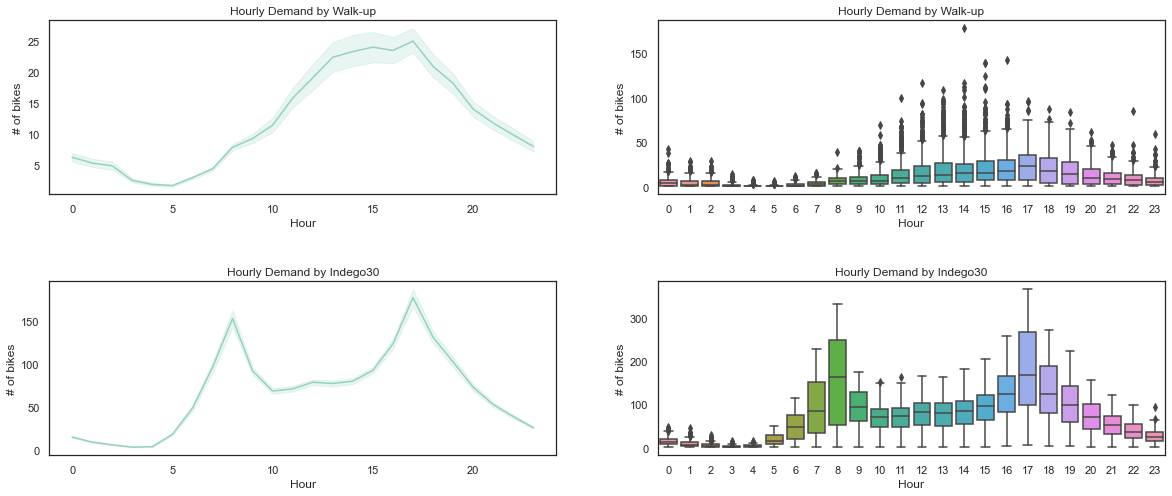

In [79]:
# hourly demand by usertype
bike_hourly_demand_walkup = PHL_17[PHL_17['user_type'] == 'Walk-up'].groupby(['date', 'hour'])['bike_id'].nunique()
bike_hourly_demand_walkup = pd.DataFrame(bike_hourly_demand_walkup)

bike_hourly_demand_Indego30 = PHL_17[PHL_17['user_type'] == 'Indego30'].groupby(['date', 'hour'])['bike_id'].nunique()
bike_hourly_demand_Indego30 = pd.DataFrame(bike_hourly_demand_Indego30)

fig, ax = plt.subplots(2,2, figsize=(20,8))

sns.lineplot(x=bike_hourly_demand_walkup.index.get_level_values(1), y=bike_hourly_demand_walkup['bike_id'],ax=ax[0,0])

sns.boxplot(x=bike_hourly_demand_walkup.index.get_level_values(1), y=bike_hourly_demand_walkup['bike_id'],ax=ax[0,1])

sns.lineplot(x=bike_hourly_demand_Indego30.index.get_level_values(1), y=bike_hourly_demand_Indego30['bike_id'],ax=ax[1,0])

sns.boxplot(x=bike_hourly_demand_Indego30.index.get_level_values(1), y=bike_hourly_demand_Indego30['bike_id'],ax=ax[1,1])

ax[0,0].set(xlabel='Hour', ylabel='# of bikes')
ax[0,1].set(xlabel='Hour', ylabel='# of bikes')
ax[1,0].set(xlabel='Hour', ylabel='# of bikes')
ax[1,1].set(xlabel='Hour', ylabel='# of bikes')

fig.subplots_adjust(hspace=.5)

ax[0,0].set_title('Hourly Demand by Walk-up')
ax[0,1].set_title('Hourly Demand by Walk-up')
ax[1,0].set_title('Hourly Demand by Indego30')
ax[1,1].set_title('Hourly Demand by Indego30')

plt.show()

Let's now apply a simple clustering algorithm, i.e. the **K-Means Algorithm**. But first we need to adapt our dataframe and **normalize**

To make this an unsupervised learning task we need to drop the label (i.e. user_type). For later checks we save the response as variable y

For this time, we are only looking at **Indego 365** subscribers and **One Day Pass** customers, i.e. people who are using the bikes frequently as well as people who are using the bikes in their freetime for example

In [80]:
X = PHL_17[["haversine_km","duration", "net_speed"]][(PHL_17["user_type"] == "One Day Pass") | (PHL_17["user_type"] == "Indego365")]
y = PHL_17[(PHL_17["user_type"] == "One Day Pass") | (PHL_17["user_type"] == "Indego365")]
X.head()

,haversine_km,duration,net_speed
279468,NaN,0 days 00:24:00,NaN
290510,1.101719,0 days 00:17:00,3.888420
290821,1.209120,0 days 00:13:00,5.580555
290827,2.402028,0 days 01:06:00,2.183662
291465,0.000000,0 days 03:32:00,0.000000


In [81]:
def td_to_minutes(td):
    return (td.seconds//60)%60

In [82]:
X["duration_minutes"] = X["duration"].apply(lambda td: td_to_minutes(td))
X.drop("duration", axis=1, inplace=True)

In [83]:
X.head()

,haversine_km,net_speed,duration_minutes
279468,NaN,NaN,24
290510,1.101719,3.888420,17
290821,1.209120,5.580555,13
290827,2.402028,2.183662,6
291465,0.000000,0.000000,32


In [84]:
print(X.isnull().sum())

haversine_km        2397
net_speed           2397
duration_minutes       0
dtype: int64


In [85]:
X = X[~X.isna().any(axis=1)]
print(X.isnull().sum())

haversine_km        0
net_speed           0
duration_minutes    0
dtype: int64


In [86]:

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# create a df out of array
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

,haversine_km,net_speed,duration_minutes
290510,-0.499854,-0.807068,0.103913
290821,-0.386636,-0.389035,-0.258827
290827,0.870877,-1.228219,-0.893621
291465,-1.661240,-1.767681,1.464186
291930,1.238898,-0.493329,1.464186


In [87]:
PHL_17_scaled = X_scaled_df
PHL_17_scaled["user_type"] = PHL_17["user_type"]

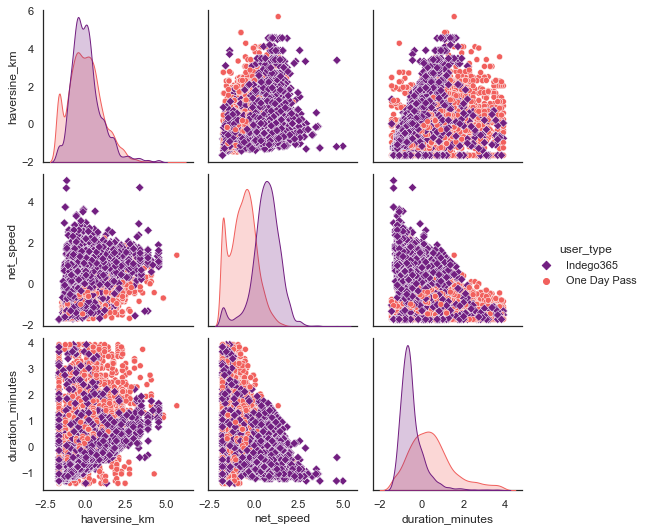

In [88]:
plt_1 = sns.pairplot(data=PHL_17_scaled, hue="user_type", palette="magma", markers=["o", "D"], hue_order=["Indego365", "One Day Pass"])

It looks like the frequent travellers (i.e. **Indego365** subscribers) are traveling **faster** and for a **shorter** time , while occasional users (i.e. **One Day Pass** holders) are traveling **slower** but for a **longer** time. This implies that the One Day Pass is used for **round trips** in particular.

Now with a standard seaborn scatterplot

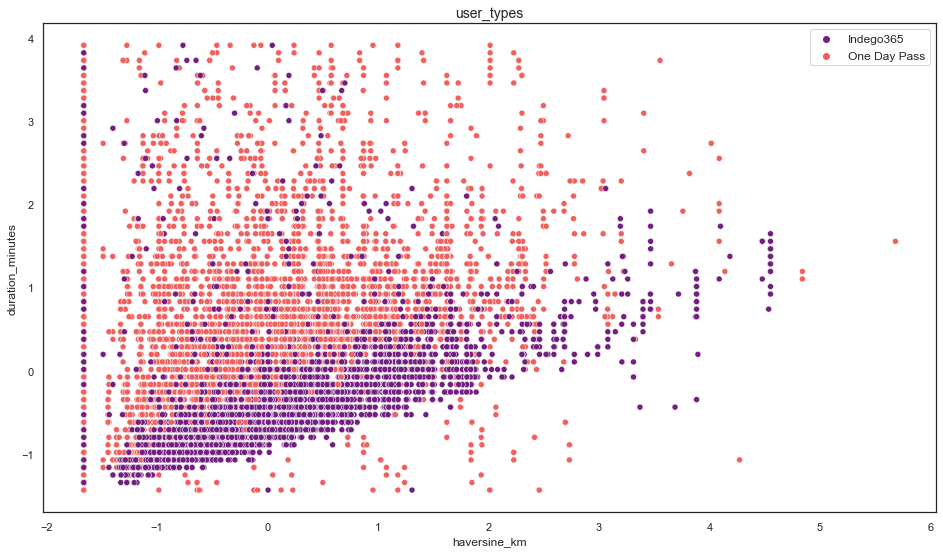

In [89]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize= (16,9))

# use the seaborn hue statement to differentiate the different species
sns.scatterplot(ax=ax, x="haversine_km", y="duration_minutes", 
                data = PHL_17_scaled, hue="user_type", palette="magma", hue_order=["Indego365", "One Day Pass"])

ax.set_xlabel("haversine_km")
ax.set_ylabel("duration_minutes")
ax.set_title("user_types", fontsize=14)
ax.legend(fontsize=12)

plt.show()

Let's now apply the **K-Means Algorithm** itself. We start by applying the **K-Means Algorithm** with **1 to 10 clusters** and then check the resulting **losses** from each of the results.

In [90]:
k_max = 10  # We have 147 datapoints, more than 50 clusters are definitely not reasonable!

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

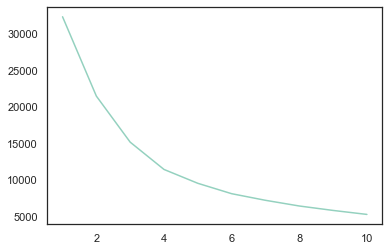

In [91]:
plt.plot(clusters, losses)
plt.show()

As we can see the **loss starts** off being **very high** and then starts getting **lower** as the **number of clusters increases**.
We previously noted, that there are **2 User-Types** in this Dataset, but the loss function **drastically decreases** even as we increase the number of clusters **above 2**. We can therefore assume, that the **User-Type isnt the perfect indicator for grouping trips together**. For example **4 clusters** would be a **better** classification for the different **Trip-Archetypes** when checking the loss function. We can check this by looking at the results from **2 clusters** vs the results from **4 clusters** and decide which would fit the task of **categorizing trip archetypes** better.

In [92]:
two_means = KMeans(n_clusters=2)
two_means.fit(X_scaled)

four_means = KMeans(n_clusters=4)
four_means.fit(X_scaled)

KMeans(n_clusters=4)

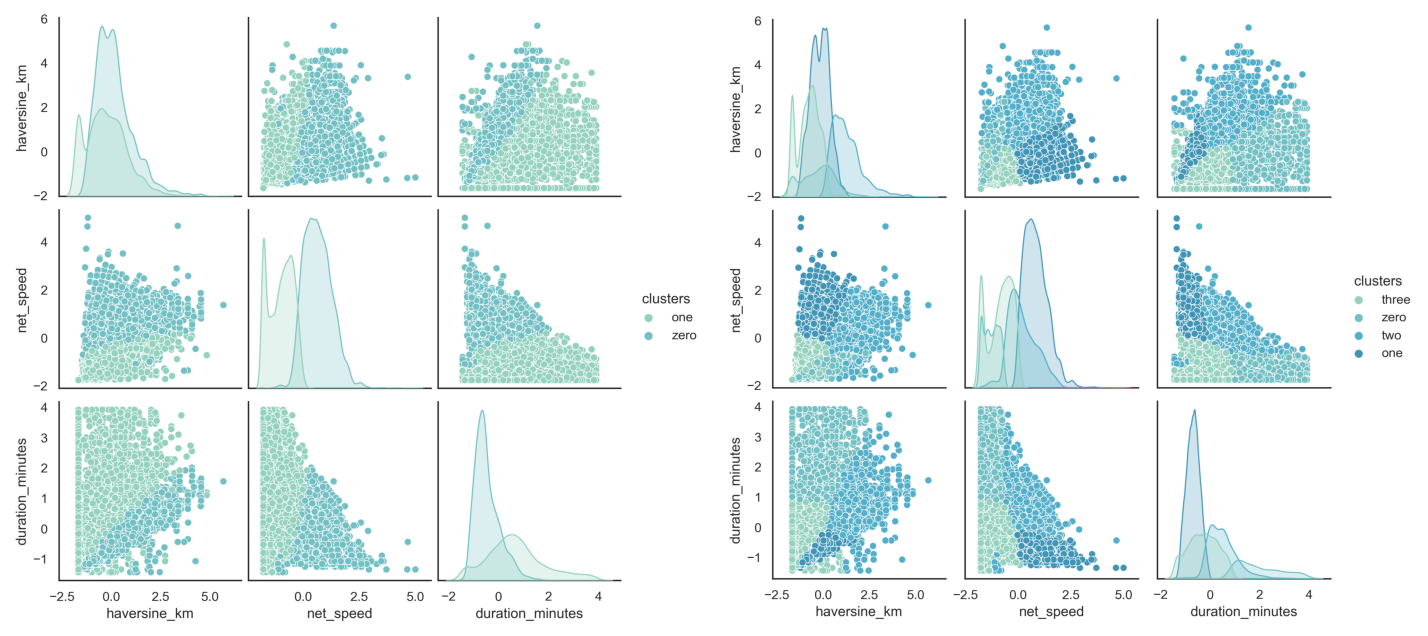

In [93]:
import matplotlib.image as mpimg

numbers = ["zero", "one", "two", "three","four","five"]
PHL_17_scaled["clusters"] = two_means.predict(X_scaled)
PHL_17_scaled["clusters"] = PHL_17_scaled["clusters"].apply(lambda x: numbers[x])
plt_1 = sns.pairplot(data= PHL_17_scaled, hue="clusters")

PHL_17_scaled['clusters'] = four_means.predict(X_scaled)
PHL_17_scaled['clusters'] = PHL_17_scaled['clusters'].apply(lambda x: numbers[x])
plt_2 = sns.pairplot(data= PHL_17_scaled, hue= 'clusters')

plt_1.savefig('plt_1.png', dpi=300)
plt_2.savefig('plt_2.png', dpi=300)

plt.close(plt_1.fig)
plt.close(plt_2.fig)

f, axarr = plt.subplots(1, 2, figsize=(20, 20))

axarr[0].imshow(mpimg.imread('plt_1.png'))
axarr[1].imshow(mpimg.imread('plt_2.png'))

[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

When comparing the **2** and **4 cluster** approach we can see that the grouping with **2 clusters works fine**. You can **easily** differeciate between the two clusters when it comes to **net_speed v. haversine_km** and **net_speed v. duration_minutes**, but when it comes to **duration_minutes v. haversine_km**, you **cannot differenciate** between the clusters because of **large overlap**.

Now we can use this knowledge to **categorize** the **entire dataset** based on **Trip-Archetypes**.

In [94]:
X = PHL_17[["haversine_km","duration", "net_speed"]]
X.head()

,haversine_km,duration,net_speed
0,2.190091,0 days 00:11:00,11.945950
1,3.221661,0 days 00:36:00,5.369436
2,3.221661,0 days 00:35:00,5.522848
3,2.463715,0 days 00:12:00,12.318573
4,0.840301,0 days 00:08:00,6.302257


In [95]:
X["duration_minutes"] = X["duration"].apply(lambda td: td_to_minutes(td))
X.drop("duration", axis=1, inplace=True)

C:\Users\vigro\AppData\Local\Temp/ipykernel_2360/325227250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["duration_minutes"] = X["duration"].apply(lambda td: td_to_minutes(td))
C:\Users\vigro\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [96]:
X.head()

,haversine_km,net_speed,duration_minutes
0,2.190091,11.945950,11
1,3.221661,5.369436,36
2,3.221661,5.522848,35
3,2.463715,12.318573,12
4,0.840301,6.302257,8


We **remove** any rows with **null values**.

In [97]:
X = X[~X.isna().any(axis=1)]

We **scale** our data and check the **amount of trips**.

In [98]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [99]:
PHL_17_scaled = X_scaled_df
PHL_17_scaled["user_type"] = PHL_17["user_type"]

We now plot the data to **check** for any **patterns** in regards to **User-Types**:
(care: this plot takes several minutes to load)

In [100]:
#sns.pairplot(data=PHL_17_scaled, hue="user_type", palette="magma")

We can tell **very little** from this plot. This means we need to look for **another way** to **categorize our trips** by, instead of by User-Types.  

Lets recategorize this Dataframe with the help of the **K-Means Algorithm**.
First we run the Algorithm with **1 to 10 clusters** to check how many clusters we should choose, by looking at the **loss function**. (care: this cell takes several minutes to load)

In [101]:
#k_max = 10 

#clusters = []
#losses = []

#for k in range(k_max):
    #model = KMeans(n_clusters=k+1)
    #model.fit(X_scaled)
    #clusters.append(k+1)
    #losses.append(model.inertia_)

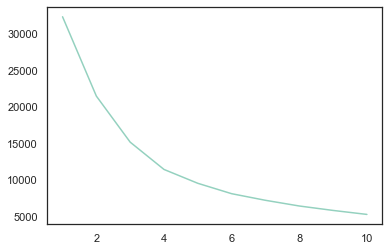

In [102]:
plt.plot(clusters, losses)
plt.show()

When looking at the **loss function**, you can see that **4 clusters** seems to not only work **great** with only **2 User-Types**, but also good, if you are looking at the **entire Dataset**.

We can now **verify** this by **plotting the result** and looking at it.

In [103]:
four_means = KMeans(n_clusters=4)
four_means.fit(X_scaled)

KMeans(n_clusters=4)

(care: this cell takes several minutes to load)

In [104]:
numbers = ["zero", "one", "two", "three"]
PHL_17_scaled["clusters"] = four_means.predict(X_scaled)
PHL_17_scaled["clusters"] = PHL_17_scaled["clusters"].apply(lambda x: numbers[x])

Y = PHL_17_scaled[['clusters']]

PHL_17_clusters = pd.concat([X, Y], axis = 1)

In [105]:
#sns.pairplot(data= PHL_17_clusters, hue="clusters")

We can now clearly identify each of the clusters as a different Trip-Archetype.
We can differenciate the duration, net speed and distance between the 4 clusters very easily although the duration is a bit more similar between the clusters than the other variables.

# 2. Predictive Analytics (Task 2)

## 2.1 Feature Engineering/Feature Selection

Creating **new Dataframe** with data from the **most frequently visited station**.

In [106]:
Features = PHL_17[PHL_17["start_station_id"] == 3023].copy()
Features.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,...,month,duration,start_lat,start_lon,end_lat,end_lon,start_coordinates,end_coordinates,haversine_km,net_speed
42,2017-01-01 10:44:00,2017-01-01 10:49:00,3023,3125,5255,Indego30,Rittenhouse Square,15th & South,2017-01-01,10,...,1,0 days 00:05:00,39.950481,-75.172859,39.943909,-75.167351,"(39.9505, -75.1729)","(39.9439, -75.1674)",0.868615,10.423386
89,2017-01-01 11:41:00,2017-01-01 12:03:00,3023,3046,3514,Walk-up,Rittenhouse Square,2nd & Market,2017-01-01,11,...,1,0 days 00:22:00,39.950481,-75.172859,39.950119,-75.144722,"(39.9505, -75.1729)","(39.9501, -75.1447)",2.398798,6.542177
122,2017-01-01 12:17:00,2017-01-01 12:25:00,3023,3064,3481,Indego30,Rittenhouse Square,"18th & Washington, Chew Playground",2017-01-01,12,...,1,0 days 00:08:00,39.950481,-75.172859,39.938400,-75.173271,"(39.9505, -75.1729)","(39.9384, -75.1733)",1.343805,10.078537
136,2017-01-01 12:27:00,2017-01-01 12:43:00,3023,3068,5193,Indego30,Rittenhouse Square,Broad & Federal,2017-01-01,12,...,1,0 days 00:16:00,39.950481,-75.172859,39.935490,-75.167107,"(39.9505, -75.1729)","(39.9355, -75.1671)",1.737553,6.515825
158,2017-01-01 12:48:00,2017-01-01 13:05:00,3023,3068,3630,Walk-up,Rittenhouse Square,Broad & Federal,2017-01-01,12,...,1,0 days 00:17:00,39.950481,-75.172859,39.935490,-75.167107,"(39.9505, -75.1729)","(39.9355, -75.1671)",1.737553,6.132541


In [107]:
date1 = pd.datetime(year=2017, month=1, day=1, hour = 12)
date2 = pd.datetime(year=2017, month=1, day=1, hour = 13)

len(Features[(Features["start_time"] >= date1) & (Features["start_time"] < date2)])

C:\Users\vigro\AppData\Local\Temp/ipykernel_2360/2071152889.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date1 = pd.datetime(year=2017, month=1, day=1, hour = 12)
C:\Users\vigro\AppData\Local\Temp/ipykernel_2360/2071152889.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date2 = pd.datetime(year=2017, month=1, day=1, hour = 13)


3

between 12am and 1 pm january 1st 2017 3 rides were taken. Check also in the Features head below.

In [108]:
date_index = pd.to_timedelta(np.arange(8760), 'H')

Features = pd.DataFrame(index = date_index)

Features["demand"] = 0

Features = PHL_17[PHL_17["start_station_id"] == 3023].set_index("start_time")
Features = Features.resample('H').count()  #Aggregating hourly

Features.rename(columns = {"end_time": "rides"}, inplace = True)

In [109]:
Features.head()

,rides,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,date,hour,weekday,month,duration,start_lat,start_lon,end_lat,end_lon,start_coordinates,end_coordinates,haversine_km,net_speed
start_time,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2017-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01-01 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01-01 05:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Since the other columns do not make sense to be aggregated, we drop them

In [110]:
Features.drop(columns = "start_station_id", inplace = True)
Features.drop(columns = "end_station_id", inplace = True)
Features.drop(columns = "start_station_name", inplace = True)
Features.drop(columns = "end_station_name", inplace = True)
Features.drop(columns = "bike_id", inplace = True)
Features.drop(columns = "user_type", inplace = True)
Features.drop(columns = "date", inplace = True)
Features.drop(columns = "hour", inplace = True)
Features.drop(columns = "weekday", inplace = True)
Features.drop(columns = "month", inplace = True)
Features.drop(columns = "duration", inplace = True)
Features.drop(columns = "start_lat", inplace = True)
Features.drop(columns = "start_lon", inplace = True)
Features.drop(columns = "end_lat", inplace = True)
Features.drop(columns = "end_lon", inplace = True)
Features.drop(columns = "start_coordinates", inplace = True)
Features.drop(columns = "end_coordinates", inplace = True)
Features.drop(columns = "haversine_km", inplace = True)
Features.drop(columns = "net_speed", inplace = True)

Creating a new column that contains the **number of rides from the previous hour**

In [111]:
Features["rides_last_hour"] = 0
x = Features.iloc[0]["rides"]
for i in Features.index:
    Features.loc[i,"rides_last_hour"] = x
    x = Features.loc[i]["rides"]

In [112]:
Features.head()

,rides,rides_last_hour
start_time,,
2017-01-01 01:00:00,2,2
2017-01-01 02:00:00,0,2
2017-01-01 03:00:00,0,0
2017-01-01 04:00:00,0,0
2017-01-01 05:00:00,0,0


Creating the **previously dropped features in a new fashion**

In [113]:
Features['hour'] = Features.index.hour
Features['weekday'] = Features.index.weekday
Features['month'] = Features.index.month
# Could also define functions in order to map it to the dataframe

We are also defining a **seasons column** (more efficient for generating binary dummies later on) and a **binary workday column**

In [114]:
def is_workday (ts):
    if (ts <= 4):
        return 1
    else: 
        return 0

In [115]:
Features["is_workday"] = Features["weekday"].apply(lambda ts: is_workday (ts))

In [116]:
def getSeason(month):
    
    winter = [12, 1, 2]
    spring = [3, 4, 5]
    summer = [6, 7, 8]
    fall = [9, 10, 11]
    
    if month in winter:
        return 0
    elif month in spring:
        return 1
    elif month in summer:
        return 2
    elif month in fall:
        return 3

In [117]:
Features["season"] = Features["month"].apply(lambda month: getSeason(month))

In [118]:
Features.head()

,rides,rides_last_hour,hour,weekday,month,is_workday,season
start_time,,,,,,,
2017-01-01 01:00:00,2,2,1,6,1,0,0
2017-01-01 02:00:00,0,2,2,6,1,0,0
2017-01-01 03:00:00,0,0,3,6,1,0,0
2017-01-01 04:00:00,0,0,4,6,1,0,0
2017-01-01 05:00:00,0,0,5,6,1,0,0


Adding the **average temperature (hourly)** and **precipitation** from the weather dataset

In [119]:
Features = Features.join(PHL_weather_17, on="start_time")
Features.drop(columns = "max_temp", inplace = True)
Features.drop(columns = "min_temp", inplace = True)

In [120]:
Features.head()

,rides,rides_last_hour,hour,weekday,month,is_workday,season,precip,avg_tmp
start_time,,,,,,,,,
2017-01-01 01:00:00,2,2,1,6,1,0,0,0.0,6.1
2017-01-01 02:00:00,0,2,2,6,1,0,0,0.0,6.7
2017-01-01 03:00:00,0,0,3,6,1,0,0,0.0,7.2
2017-01-01 04:00:00,0,0,4,6,1,0,0,0.0,7.8
2017-01-01 05:00:00,0,0,5,6,1,0,0,0.0,7.8


Plotting a **covariance matrix** and a **correlation matrix** of the newly defined features

In [121]:
covariance = Features.cov()
covariance

,rides,rides_last_hour,hour,weekday,month,is_workday,season,precip,avg_tmp
rides,11.435553,7.097911,9.401663,-0.096170,1.071797,0.049906,0.833299,-0.090822,11.593380
rides_last_hour,7.097911,11.332021,10.664303,-0.092233,1.062079,0.045963,0.830036,-0.097509,12.668058
hour,9.401663,10.664303,47.505700,-0.006706,-0.035016,0.000042,-0.009826,0.038137,9.762533
weekday,-0.096170,-0.092233,-0.006706,4.022333,0.076155,-0.717784,-0.010845,-0.007386,-0.679315
month,1.071797,1.062079,-0.035016,0.076155,11.846232,-0.014056,2.216477,-0.039432,6.116357
is_workday,0.049906,0.045963,0.000042,-0.717784,-0.014056,0.204236,0.004405,-0.002286,0.169619
season,0.833299,0.830036,-0.009826,-0.010845,2.216477,0.004405,1.234486,-0.012925,5.942121
precip,-0.090822,-0.097509,0.038137,-0.007386,-0.039432,-0.002286,-0.012925,0.072254,-0.156549
avg_tmp,11.593380,12.668058,9.762533,-0.679315,6.116357,0.169619,5.942121,-0.156549,95.749409


- If it rains (precip = 1), less rides are taken (negative covariance, opposing values)
- The higher the temperature, the more rides are taken (positive covariance)
- If the day is a weekday (is_weekday = 1), more rides are taken (positive covariance)

In [122]:
correlation = Features.corr()
correlation

,rides,rides_last_hour,hour,weekday,month,is_workday,season,precip,avg_tmp
rides,1.000000,0.623517,0.403370,-0.014180,0.092086,0.032656,0.221783,-0.099539,0.349041
rides_last_hour,0.623517,1.000000,0.459627,-0.013661,0.091667,0.030213,0.221922,-0.107593,0.383983
hour,0.403370,0.459627,1.000000,-0.000485,-0.001476,0.000013,-0.001283,0.020494,0.144117
weekday,-0.014180,-0.013661,-0.000485,1.000000,0.011032,-0.791934,-0.004867,-0.013726,-0.034679
month,0.092086,0.091667,-0.001476,0.011032,1.000000,-0.009036,0.579602,-0.042557,0.181331
is_workday,0.032656,0.030213,0.000013,-0.791934,-0.009036,1.000000,0.008773,-0.018796,0.038311
season,0.221783,0.221922,-0.001283,-0.004867,0.579602,0.008773,1.000000,-0.043155,0.544993
precip,-0.099539,-0.107593,0.020494,-0.013726,-0.042557,-0.018796,-0.043155,1.000000,-0.059518
avg_tmp,0.349041,0.383983,0.144117,-0.034679,0.181331,0.038311,0.544993,-0.059518,1.000000


Correlation normalizes the covariance and gives information about the strength of the linear connection between the features

<AxesSubplot:>

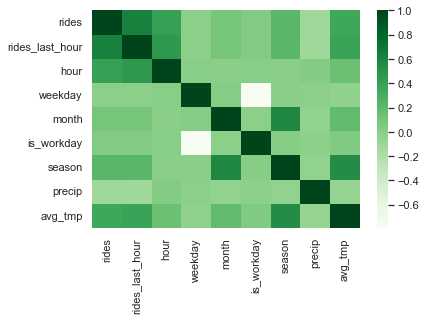

In [123]:
sns.heatmap(correlation, xticklabels=correlation.columns,yticklabels=correlation.columns, cmap="Greens")

Generating **binary dummies** in order for the ML algorithm to run fluently

In [124]:
hours = pd.get_dummies(Features["hour"], prefix="hour")
Features[list(hours.columns)] = hours

In [125]:
days = pd.get_dummies(Features["weekday"], prefix="weekday")
Features[list(days.columns)] = days

In [126]:
seasons = pd.get_dummies(Features["season"], prefix="season")
Features[list(seasons.columns)] = seasons

The last binary dummy (e.g."weekday_6") is redundant since it is equal to the other binaries being 0. Therefore, they can be dropped

In [127]:
Features.drop(columns="hour_23", inplace=True)
Features.drop(columns="weekday_6", inplace=True)
Features.drop(columns="season_3", inplace=True)

In [128]:
Features

,rides,rides_last_hour,hour,weekday,month,is_workday,season,precip,avg_tmp,hour_0,...,hour_22,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,season_0,season_1,season_2
start_time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,2,2,1,6,1,0,0,0.0,6.1,0,...,0,0,0,0,0,0,0,1,0,0
2017-01-01 02:00:00,0,2,2,6,1,0,0,0.0,6.7,0,...,0,0,0,0,0,0,0,1,0,0
2017-01-01 03:00:00,0,0,3,6,1,0,0,0.0,7.2,0,...,0,0,0,0,0,0,0,1,0,0
2017-01-01 04:00:00,0,0,4,6,1,0,0,0.0,7.8,0,...,0,0,0,0,0,0,0,1,0,0
2017-01-01 05:00:00,0,0,5,6,1,0,0,0.0,7.8,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 16:00:00,0,1,16,6,12,0,0,0.0,-8.9,0,...,0,0,0,0,0,0,0,1,0,0
2017-12-31 17:00:00,0,0,17,6,12,0,0,0.0,-8.9,0,...,0,0,0,0,0,0,0,1,0,0
2017-12-31 18:00:00,0,0,18,6,12,0,0,0.0,-8.3,0,...,0,0,0,0,0,0,0,1,0,0


removing null values

In [129]:
print(Features.isnull().sum())

rides                0
rides_last_hour      0
hour                 0
weekday              0
month                0
is_workday           0
season               0
precip             528
avg_tmp            528
hour_0               0
hour_1               0
hour_2               0
hour_3               0
hour_4               0
hour_5               0
hour_6               0
hour_7               0
hour_8               0
hour_9               0
hour_10              0
hour_11              0
hour_12              0
hour_13              0
hour_14              0
hour_15              0
hour_16              0
hour_17              0
hour_18              0
hour_19              0
hour_20              0
hour_21              0
hour_22              0
weekday_0            0
weekday_1            0
weekday_2            0
weekday_3            0
weekday_4            0
weekday_5            0
season_0             0
season_1             0
season_2             0
dtype: int64


In [132]:
Features = Features[~Features.isna().any(axis=1)]
print(Features.isnull().sum())

rides              0
rides_last_hour    0
hour               0
weekday            0
month              0
is_workday         0
season             0
precip             0
avg_tmp            0
hour_0             0
hour_1             0
hour_2             0
hour_3             0
hour_4             0
hour_5             0
hour_6             0
hour_7             0
hour_8             0
hour_9             0
hour_10            0
hour_11            0
hour_12            0
hour_13            0
hour_14            0
hour_15            0
hour_16            0
hour_17            0
hour_18            0
hour_19            0
hour_20            0
hour_21            0
hour_22            0
weekday_0          0
weekday_1          0
weekday_2          0
weekday_3          0
weekday_4          0
weekday_5          0
season_0           0
season_1           0
season_2           0
dtype: int64


## Linear Regression

Creating a **Linear Regression** to predict the number of **rides per hour** in relation to the previously created **features**. 

**Splitting** the Dataset into a **train, test and hold set** with a **50/30/20** split.

In [134]:
X = Features[Features.columns[(Features.columns != "rides") & (Features.columns != "start_time")]]
y = Features[["rides"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=34 )
x_train, x_hold, y_train, y_hold = train_test_split(x_train, y_train, test_size=(0.2/0.7),random_state=34 )

**Preparing** the data for later use.

In [135]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
y_hold = y_hold.values.ravel()

In [136]:
x_train_1 = x_train[['hour']]
x_test_1 = x_test[['hour']]
x_hold_1 = x_hold[['hour']]

In [137]:
x_train.drop(columns = 'hour', inplace = True)
x_train.drop(columns = 'weekday', inplace = True)
x_train.drop(columns = 'month', inplace = True)
x_train.drop(columns = 'season', inplace = True)

In [138]:
x_train = x_train.values
x_test = x_test.values
x_hold = x_hold.values

x_train_1 = x_train_1.values.ravel()
x_test_1 = x_test_1.values.ravel()
x_hold_1 = x_hold_1.values.ravel()

Creating **test regression** with only 1 feature (hour).

In [170]:
lin_x_train_1 = LinearRegression(fit_intercept=True, normalize=False)
lin_x_train_1.fit(x_train_1.reshape(-1,1), y_train)

lin_x_test_1 = LinearRegression(fit_intercept=True, normalize=False)
lin_x_test_1.fit(x_test_1.reshape(-1,1), y_test)

lin_x_hold_1 = LinearRegression(fit_intercept=True, normalize=False)
lin_x_hold_1.fit(x_hold_1.reshape(-1,1), y_hold)

LinearRegression()

Plotting the result.

[2.23343015] 2.7893585736969366


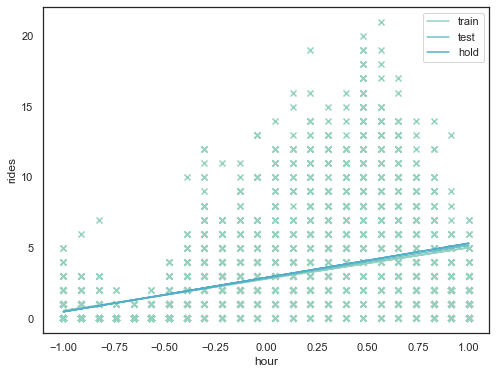

In [171]:
model_x_train_1 = lin_x_train_1.predict(x_train_1.reshape(-1,1))
model_x_test_1 = lin_x_test_1.predict(x_test_1.reshape(-1,1))
model_x_hold_1 = lin_x_hold_1.predict(x_hold_1.reshape(-1,1))



fig,ax = plt.subplots(figsize = (8,6))

ax.scatter(x_train_1, y_train, marker="x")
ax.set_xlabel("hour")
ax.set_ylabel("rides")

ax.plot(x_train_1, model_x_train_1)
ax.plot(x_test_1, model_x_test_1)
ax.plot(x_hold_1, model_x_hold_1)
ax.legend(['train','test', 'hold'])
#plt.savefig('summer data_peak demand_line.pdf')
print(lin_x_train_1.coef_, lin_x_train_1.intercept_)

Printing the MSE.

In [172]:
print("Mean Squared Error:",mean_squared_error(model_x_train_1, y_train),"rides^2")
print("Mean Squared Error:",mean_squared_error(model_x_test_1, y_test),"rides^2")
print("Mean Squared Error:",mean_squared_error(model_x_hold_1, y_hold),"rides^2")

Mean Squared Error: 9.887579446671769 rides^2
Mean Squared Error: 9.409820942004824 rides^2
Mean Squared Error: 9.12191660404464 rides^2


Now creating the regressions with all features.

In [174]:
lin_x_train = LinearRegression(fit_intercept = True, normalize = False)
lin_x_train.fit(x_train, y_train)
model_x_train = lin_x_train.predict(x_train)

lin_x_test = LinearRegression(fit_intercept = True, normalize = False)
lin_x_test.fit(x_test, y_test)
model_x_test = lin_x_test.predict(x_test)

lin_x_hold = LinearRegression(fit_intercept = True, normalize = False)
lin_x_hold.fit(x_hold, y_hold)
model_x_hold = lin_x_hold.predict(x_hold)

Printing coefficients and intercept of train regression.

In [176]:
print('Coefficients', lin_x_train.coef_, 'Intercept', lin_x_train.intercept_)

Coefficients [ 7.59632578e+00 -1.22033724e+11 -1.65388865e+01  1.47115183e+00
 -1.13170494e+01 -8.74510305e+00 -1.18880754e+01 -1.35146146e+01
 -1.19255843e+01 -7.79783117e+00  1.52064488e-01  2.06799962e+01
  4.70144748e+01  2.12407185e+01  2.94905822e+01  4.28173587e+01
  4.83800589e+01  4.22257246e+01  6.01786871e+01  4.88987541e+01
  7.71689999e+01  1.20862039e+02  6.91363794e+01  4.92581110e+01
  2.93689244e+01  1.41349415e+01  3.51319217e+00  1.22033724e+11
  1.22033724e+11  1.22033724e+11  1.22033724e+11  1.22033724e+11
  1.00521182e+00 -9.14760376e+00 -4.03614377e+00 -7.65651531e+00] Intercept 271186053845.92545


printing the MSE.

In [177]:
print("Mean Squared Error:",mean_squared_error(model_x_train, y_train),"rides^2")
print("Mean Squared Error:",mean_squared_error(model_x_test, y_test),"rides^2")
print("Mean Squared Error:",mean_squared_error(model_x_hold, y_hold),"rides^2")

Mean Squared Error: 5.247428844853423 rides^2
Mean Squared Error: 5.079676894903728 rides^2
Mean Squared Error: 4.873644677929576 rides^2


Now checking out the poly regression to see whether it is better than linear regression.

## Poly-Regression

Splitting our data in a 50/30/20 ratio with a training a test and a holdout dataset

plotting our data with rides dependent only on hours using poly-regression first with degree 3

In [196]:
def plot_scikit_output (x_1, x_2, x_3, y_1, y_2, y_3, fitted_model_1, fitted_model_2, fitted_model_3, poly):
    poly_1 = poly
    poly_2 = poly
    poly_3 = poly
    
    min_x_1, max_x_1 = x_1.min(), x_1.max()
    xt1 = np.linspace(min_x_1-1, max_x_1+1, 400)
    
    min_x_2, max_x_2 = x_2.min(), x_2.max()
    xt2 = np.linspace(min_x_2-1, max_x_2+1, 400)
    
    min_x_3, max_x_3 = x_3.min(), x_3.max()
    xt3 = np.linspace(min_x_3-1, max_x_3+1, 400)
    
    xt1_poly = poly_1.fit_transform(xt1.reshape(-1,1))
    xt2_poly = poly_2.fit_transform(xt2.reshape(-1,1))
    xt3_poly = poly_3.fit_transform(xt3.reshape(-1,1))
    
    # plotting routine
    plt.figure(figsize = (8,6))
    plt.scatter(x_1, y_1, marker="x")
    plt.scatter(x_2, y_2, marker= "o")
    plt.scatter(x_3, y_3, marker= "v")
    ylim = plt.ylim()
    plt.plot(xt1, fitted_model_1.predict(xt1_poly), 'C1')
    plt.plot(xt2, fitted_model_2.predict(xt2_poly), 'C2')
    plt.plot(xt3, fitted_model_3.predict(xt3_poly), 'C3')
    plt.xlabel("hour")
    plt.ylabel("rides (per hour)")
    plt.xlim([min_x_1-0.25, max_x_1+0.25])
    plt.ylim(ylim)

Creating the regressions. Note: **we wont touch upon regularization in this notebook** because it would be a bit much. thats why alpha is 0 in all our models.

In [207]:
Poly_1 = PolynomialFeatures(degree = 3)
X_Poly_1 = Poly_1.fit_transform(x_train_1.reshape(-1, 1))

Poly_2 = PolynomialFeatures(degree = 3)
X_Poly_2 = Poly_2.fit_transform(x_test_1.reshape(-1, 1))

Poly_3 = PolynomialFeatures(degree = 3)
X_Poly_3 = Poly_3.fit_transform(x_hold_1.reshape(-1, 1))

model_x_train_1 = Ridge(alpha = 0, normalize = True, solver = 'lsqr')
model_x_train_1.fit(X_Poly, y_train)

model_x_test_1 = Ridge(alpha = 0, normalize = True, solver = 'lsqr')
model_x_test_1.fit(X_Poly, y_train)

model_x_hold_1 = Ridge(alpha = 0, normalize = True, solver = 'lsqr')
model_x_hold_1.fit(X_Poly, y_train)
prediction = model_x_train_1.predict(X_Poly)

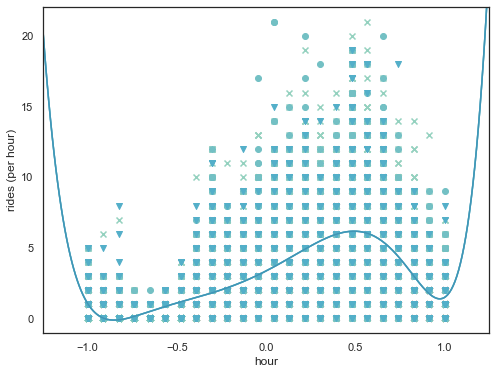

In [208]:
plot_scikit_output(x_train_1, x_test_1, x_hold_1, y_train, y_test, y_hold, model_x_train_1, model_x_test_1, model_x_hold_1, Poly)

Plotting the error for the regression with degrees 1 to 50

In [199]:
def ls_poly(x, y, d): #ls=lest squares
    
    # Create polynomial features
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    
    return theta

Text(0, 0.5, 'Mean squared error')

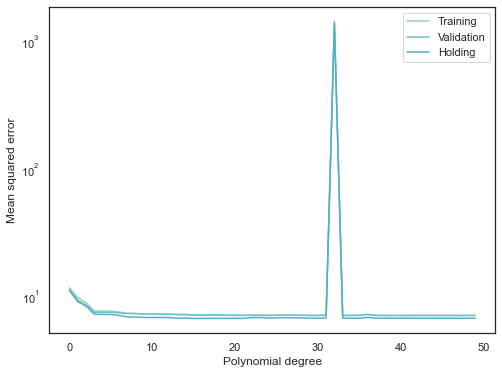

In [200]:
min_x_train, max_x_train = x_train_1.min(), x_train_1.max()
x_train_1 = 2*(x_train_1 - min_x_train)/(max_x_train - min_x_train) - 1
x_test_1 = 2*(x_test_1 - min_x_train)/(max_x_train - min_x_train) - 1
x_hold_1 = 2*(x_hold_1 - min_x_train)/(max_x_train - min_x_train) - 1
def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    

err_train = []
err_cv = []
err_hold = []
for i in range(50): 
    theta = ls_poly(x_train_1, y_train, i)
    err_train.append(((poly_feat(x_train_1,i) @ theta - y_train)**2).mean())
    err_cv.append(((poly_feat(x_test_1,i) @ theta - y_test)**2).mean())
    err_hold.append(((poly_feat(x_hold_1,i) @ theta - y_hold)**2).mean())

plt.figure(figsize = (8,6))
plt.semilogy(range(50), err_train, range(50), err_cv, range(50), err_hold)
plt.legend(["Training", "Validation", 'Holding'])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

Looking at the relevant degrees.

Text(0, 0.5, 'Mean squared error')

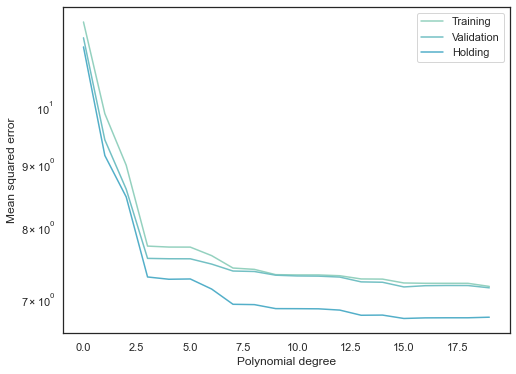

In [201]:
err_train = []
err_cv = []
err_hold = []
for i in range(20): 
    theta = ls_poly(x_train_1, y_train, i)
    err_train.append(((poly_feat(x_train_1,i) @ theta - y_train)**2).mean())
    err_cv.append(((poly_feat(x_test_1,i) @ theta - y_test)**2).mean())
    err_hold.append(((poly_feat(x_hold_1,i) @ theta - y_hold)**2).mean())

plt.figure(figsize = (8,6))
plt.semilogy(range(20), err_train, range(20), err_cv, range(20), err_hold)
plt.legend(["Training", "Validation", 'Holding'])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

Between 3 and 20 the degrees seem to work very similarily good so we use degree 8 to restrict overfitting on our end but to only have minimal error aswell.
We can now check the results. Here we can also look at all of the factors we use in our regression. 

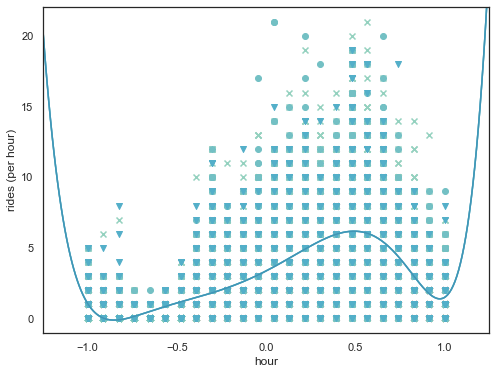

In [206]:
Poly_1 = PolynomialFeatures(degree = 8)
X_Poly_1 = Poly_1.fit_transform(x_train_1.reshape(-1, 1))

Poly_2 = PolynomialFeatures(degree = 8)
X_Poly_2 = Poly_2.fit_transform(x_test_1.reshape(-1, 1))

Poly_3 = PolynomialFeatures(degree = 8)
X_Poly_3 = Poly_3.fit_transform(x_hold_1.reshape(-1, 1))

model_x_train_1 = Ridge(alpha = 0, normalize = True, solver = 'lsqr')
model_x_train_1.fit(X_Poly, y_train)

model_x_test_1 = Ridge(alpha = 0, normalize = True, solver = 'lsqr')
model_x_test_1.fit(X_Poly, y_train)

model_x_hold_1 = Ridge(alpha = 0, normalize = True, solver = 'lsqr')
model_x_hold_1.fit(X_Poly, y_train)

plot_scikit_output(x_train_1, x_test_1, x_hold_1, y_train, y_test, y_hold, model_x_train_1, model_x_test_1, model_x_hold_1, Poly)

Now we look at the dataset with all of our previously created features. Because we cannot plot the regression itself we will resort to plotting the Mean Squared Error of the regressions with degrees 1 to 50. 

Text(0, 0.5, 'Mean squared error')

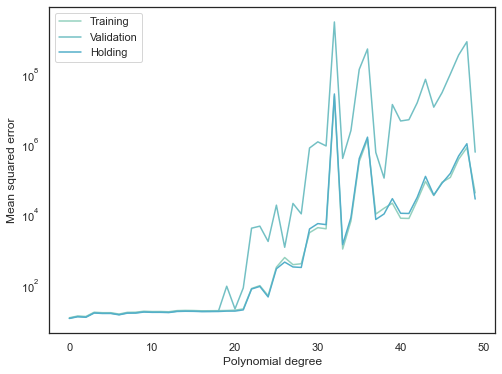

In [203]:
min_x_train, max_x_train = x_train.min(), x_train.max()
x_train = 2*(x_train - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(x_test - min_x_train)/(max_x_train - min_x_train) - 1
x_hold = 2*(x_hold - min_x_train)/(max_x_train - min_x_train) - 1

err_train = []
err_cv = []
err_hold = []
for i in range(50): 
    theta = ls_poly(x_train_1, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_cv.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())
    err_hold.append(((poly_feat(x_hold,i) @ theta - y_hold)**2).mean())
plt.figure(figsize = (8,6))
plt.semilogy(range(50), err_train, range(50), err_cv, range(50), err_hold)
plt.legend(["Training", "Validation", 'Holding'])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

Text(0, 0.5, 'Mean squared error')

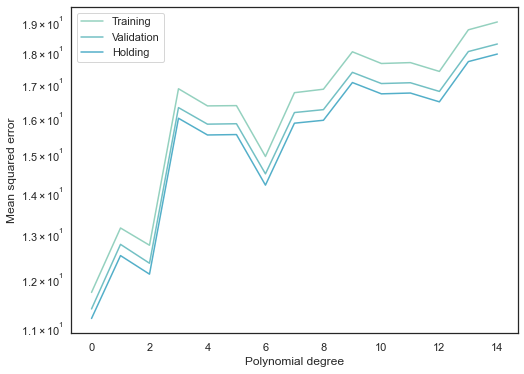

In [204]:
err_train = []
err_cv = []
err_hold = []
for i in range(15): 
    theta = ls_poly(x_train_1, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_cv.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())
    err_hold.append(((poly_feat(x_hold,i) @ theta - y_hold)**2).mean())
plt.figure(figsize = (8,6))
plt.semilogy(range(15), err_train, range(15), err_cv, range(15), err_hold)
plt.legend(["Training", "Validation", 'Holding'])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

Looking at this graph shows that a polynomial with degree 6 would be best. Because of limitations set by sklearns fit_transform () function a polynomial degrees bigger than 4 will not work in this case though.

In [158]:
Poly = PolynomialFeatures(degree = 4)
X_Poly = Poly.fit_transform(x_train)

model_x_train = Ridge(alpha = 0.1, normalize = True, solver = 'lsqr')
model_x_train.fit(X_Poly, y_train)
prediction = model_x_train.predict(X_Poly)

printing out the coefficients and the intercept of the regression

In [159]:
print("Coefficients ", model_x_train.coef_, "\nIntercept ", model_x_train.intercept_)

Coefficients  [0.         0.00067531 0.00339711 ... 0.08265111 0.05425473 0.0252383 ] 
Intercept  101.54574355462725
